**AUTHOR:** Gbenga Adeleye ([LinkedIn](www.linkedin.com/in/gbenga-adeleye-p-eng-29189716))

**DATE:** 7 September 2022

# REQUISITE LIBRARY INSTALLATION & DATASET LOAD/PREVIEW

In [41]:
 # Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from IPython.display import display
from sklearn.feature_selection import mutual_info_regression
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
from statsmodels.tsa.stattools import pacf
import statsmodels.api as sm
!pip install gekko
from gekko import GEKKO
path = ''  # Enter filepath to dataset file

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [42]:
# Load Dataset, parse "time-stamp" column as 1-sec time variable and set as index
df = pd.read_csv(path + 'continuous_factory_process.csv',
                 parse_dates=['time_stamp']).set_index('time_stamp').to_period('1S')
df.index=df.index.to_timestamp()
df.head()

AmbientConditions.AmbientHumidity.U.Actual  \
time_stamp                                                        
2019-03-06 10:52:33                                       17.24   
2019-03-06 10:52:34                                       17.24   
2019-03-06 10:52:35                                       17.24   
2019-03-06 10:52:36                                       17.24   
2019-03-06 10:52:37                                       17.24   

                     AmbientConditions.AmbientTemperature.U.Actual  \
time_stamp                                                           
2019-03-06 10:52:33                                          23.53   
2019-03-06 10:52:34                                          23.53   
2019-03-06 10:52:35                                          23.53   
2019-03-06 10:52:36                                          23.53   
2019-03-06 10:52:37                                          23.53   

                     Machine1.RawMaterial.Property1  \
time_stamp                                            
2019-03-06 10:52:33                           11.54   
2019-03-06 10:52:34                           11.54   
2019-03-06 10:52:35                           11.54   
2019-03-06 10:52:36                           11.54   
2019-03-06 10:52:37                           11.54   

                     Machine1.RawMaterial.Property2  \
time_stamp                                            
2019-03-06 10:52:33                             200   
2019-03-06 10:52:34                             200   
2019-03-06 10:52:35                             200   
2019-03-06 10:52:36                             200   
2019-03-06 10:52:37                             200   

                     Machine1.RawMaterial.Property3  \
time_stamp                                            
2019-03-06 10:52:33                           963.0   
2019-03-06 10:52:34                           963.0   
2019-03-06 10:52:35                           963.0   
2019-03-06 10:52:36                           963.0   
2019-03-06 10:52:37                           963.0   

                     Machine1.RawMaterial.Property4  \
time_stamp                                            
2019-03-06 10:52:33                             247   
2019-03-06 10:52:34                             247   
2019-03-06 10:52:35                             247   
2019-03-06 10:52:36                             247   
2019-03-06 10:52:37                             247   

                     Machine1.RawMaterialFeederParameter.U.Actual  \
time_stamp                                                          
2019-03-06 10:52:33                                       1241.26   
2019-03-06 10:52:34                                       1246.09   
2019-03-06 10:52:35                                       1246.29   
2019-03-06 10:52:36                                       1247.59   
2019-03-06 10:52:37                                       1252.83   

                     Machine1.Zone1Temperature.C.Actual  \
time_stamp                                                
2019-03-06 10:52:33                                72.0   
2019-03-06 10:52:34                                72.0   
2019-03-06 10:52:35                                72.0   
2019-03-06 10:52:36                                72.0   
2019-03-06 10:52:37                                72.1   

                     Machine1.Zone2Temperature.C.Actual  \
time_stamp                                                
2019-03-06 10:52:33                                72.3   
2019-03-06 10:52:34                                72.3   
2019-03-06 10:52:35                                72.3   
2019-03-06 10:52:36                                72.3   
2019-03-06 10:52:37                                72.4   

                     Machine1.MotorAmperage.U.Actual  ...  \
time_stamp                                            ...   
2019-03-06 10:52:33                            48.03  ...   
2019-03-06 10:52:34  

# DATAFRAME REVIEW & PRE-PROCESSING

**CHECK SEQUENTIALITY OF DATAFRAME INDEX TIMESTAMPS**

Before continuing, there is the need to check the timestamps in the dataframe index, to confirm that they're sequential, i.e. there are no missing timestamps and/or instances of multiple entries of existing timestamps.

In [43]:
# Function to check sequentiality of dataframe timestamps
def check_df_index():
  # First create list of sequential timestamps, whose start/end timestamps coincide with those of the dataframe index and follow the same
  # 1-sec frequency
  range1=pd.date_range(start=df.index[0],end=df.index[-1],freq=pd.DateOffset(seconds=1))
  
  # Copy timestamps of dataframe index
  range2=df.index
  
  # Perform Analyses
  print(f"The following timestamps are not in the dataframe index:\n{[str(x) for x in range1.difference(range2).to_list()]}")
  print(f"\nThe lengths of the dataframe index and the reconstructed sequential index are:\ndf index: {len(range2)}\nsequential index: {len(range1)}")
  counts={}
  names=[str(x) for x in range2.to_list()]
  for name in names:
    counts[name]=counts.get(name,0)+1
  print(f"\nThe timestamps appearing multiple times in the dataframe index including their counts are:\n{[(x,counts[x]) for x in counts.keys() if counts[x]>1]}")

check_df_index()

The following timestamps are not in the dataframe index:
['2019-03-06 11:07:52', '2019-03-06 11:26:16', '2019-03-06 12:27:39', '2019-03-06 12:32:59', '2019-03-06 12:40:52', '2019-03-06 13:15:39', '2019-03-06 13:23:06', '2019-03-06 13:31:48', '2019-03-06 13:37:15', '2019-03-06 13:46:22', '2019-03-06 13:51:46', '2019-03-06 13:56:30', '2019-03-06 14:04:14', '2019-03-06 14:25:03']

The lengths of the dataframe index and the reconstructed sequential index are:
df index: 14088
sequential index: 14088

The timestamps appearing multiple times in the dataframe index including their counts are:
[('2019-03-06 10:52:52', 2), ('2019-03-06 10:53:06', 3), ('2019-03-06 11:20:29', 2), ('2019-03-06 11:43:37', 2), ('2019-03-06 11:55:59', 2), ('2019-03-06 12:24:29', 2), ('2019-03-06 12:43:41', 2), ('2019-03-06 13:17:49', 2), ('2019-03-06 13:19:21', 2), ('2019-03-06 13:33:39', 2), ('2019-03-06 13:44:00', 2), ('2019-03-06 14:09:43', 2), ('2019-03-06 14:31:55', 2)]


<p align="justify">So, what appears to be happening here is that the dataframe index is missing about 14 timestamps, e.g. '2019-03-06 11:26:16'. To make up the completeness of the index length, some of the existing timestamps have repeated entries. For example, '2019-03-06 10:53:06' has up to 3 entries.

Not sure if this points to potential issues with the production plant's data logging tool during the test run, but having the timestamp anomalies in the dataframe index might impact the quality of its subsequent EDA, and could lead to errors in the model training steps.

Next, there is the need to check samples of the repeated timestamps, to see if the corresponding dataframe column entries are also repeated, or if unique.</p>

In [44]:
display(df.loc['2019-03-06 10:52:52'])
display(df.loc['2019-03-06 10:53:06'])

AmbientConditions.AmbientHumidity.U.Actual  \
time_stamp                                                        
2019-03-06 10:52:52                                       17.24   
2019-03-06 10:52:52                                       17.24   

                     AmbientConditions.AmbientTemperature.U.Actual  \
time_stamp                                                           
2019-03-06 10:52:52                                          23.53   
2019-03-06 10:52:52                                          23.53   

                     Machine1.RawMaterial.Property1  \
time_stamp                                            
2019-03-06 10:52:52                           11.54   
2019-03-06 10:52:52                           11.54   

                     Machine1.RawMaterial.Property2  \
time_stamp                                            
2019-03-06 10:52:52                             200   
2019-03-06 10:52:52                             200   

                     Machine1.RawMaterial.Property3  \
time_stamp                                            
2019-03-06 10:52:52                           963.0   
2019-03-06 10:52:52                           963.0   

                     Machine1.RawMaterial.Property4  \
time_stamp                                            
2019-03-06 10:52:52                             247   
2019-03-06 10:52:52                             247   

                     Machine1.RawMaterialFeederParameter.U.Actual  \
time_stamp                                                          
2019-03-06 10:52:52                                   1242.830000   
2019-03-06 10:52:52                                   1241.780852   

                     Machine1.Zone1Temperature.C.Actual  \
time_stamp                                                
2019-03-06 10:52:52                           72.100000   
2019-03-06 10:52:52                           72.100109   

                     Machine1.Zone2Temperature.C.Actual  \
time_stamp                                                
2019-03-06 10:52:52                               72.50   
2019-03-06 10:52:52                               72.55   

                     Machine1.MotorAmperage.U.Actual  ...  \
time_stamp                                            ...   
2019-03-06 10:52:52                        49.240000  ...   
2019-03-06 10:52:52                        49.684379  ...   

                     Stage2.Output.Measurement10.U.Actual  \
time_stamp                                                  
2019-03-06 10:52:52                          0.000000e+00   
2019-03-06 10:52:52                         2.123500e-105   

                     Stage2.Output.Measurement10.U.Setpoint  \
time_stamp                                                    
2019-03-06 10:52:52                                    7.93   
2019-03-06 10:52:52                                    7.93   

                     Stage2.Output.Measurement11.U.Actual  \
time_stamp                                                  
2019-03-06 10:52:52                          0.000000e+00   
2019-03-06 10:52:52                         1.099600e-105   

                     Stage2.Output.Measurement11.U.Setpoint  \
time_stamp                                                    
2019-03-06 10:52:52                                    5.65   
2019-03-06 10:52:52                                    5.65   

                     Stage2.Output.Measurement12.U.Actual  \
time_stamp                                                  
2019-03-06 10:52:52                          0.000000e+00   
2019-03-06 10:52:52                         2.521900e-106   

                     Stage2.Output.Measurement12.U.Setpoint  \
time_stamp                                                    
2019-03-06 10:52:52                                    1.85   
2019-03-06 10:52:52                                    1.85   

                     Stage2.Output.Measurement13.U.Actual  \
time_stamp                          

AmbientConditions.AmbientHumidity.U.Actual  \
time_stamp                                                        
2019-03-06 10:53:06                                       17.24   
2019-03-06 10:53:06                                       17.24   
2019-03-06 10:53:06                                       17.24   

                     AmbientConditions.AmbientTemperature.U.Actual  \
time_stamp                                                           
2019-03-06 10:53:06                                          23.53   
2019-03-06 10:53:06                                          23.53   
2019-03-06 10:53:06                                          23.53   

                     Machine1.RawMaterial.Property1  \
time_stamp                                            
2019-03-06 10:53:06                           11.54   
2019-03-06 10:53:06                           11.54   
2019-03-06 10:53:06                           11.54   

                     Machine1.RawMaterial.Property2  \
time_stamp                                            
2019-03-06 10:53:06                             200   
2019-03-06 10:53:06                             200   
2019-03-06 10:53:06                             200   

                     Machine1.RawMaterial.Property3  \
time_stamp                                            
2019-03-06 10:53:06                           963.0   
2019-03-06 10:53:06                           963.0   
2019-03-06 10:53:06                           963.0   

                     Machine1.RawMaterial.Property4  \
time_stamp                                            
2019-03-06 10:53:06                             247   
2019-03-06 10:53:06                             247   
2019-03-06 10:53:06                             247   

                     Machine1.RawMaterialFeederParameter.U.Actual  \
time_stamp                                                          
2019-03-06 10:53:06                                   1245.381787   
2019-03-06 10:53:06                                   1241.587658   
2019-03-06 10:53:06                                   1242.810000   

                     Machine1.Zone1Temperature.C.Actual  \
time_stamp                                                
2019-03-06 10:53:06                                72.2   
2019-03-06 10:53:06                                72.2   
2019-03-06 10:53:06                                72.2   

                     Machine1.Zone2Temperature.C.Actual  \
time_stamp                                                
2019-03-06 10:53:06                           72.625782   
2019-03-06 10:53:06                           72.674218   
2019-03-06 10:53:06                           72.700000   

                     Machine1.MotorAmperage.U.Actual  ...  \
time_stamp                                            ...   
2019-03-06 10:53:06                        49.383039  ...   
2019-03-06 10:53:06                        49.108716  ...   
2019-03-06 10:53:06                        48.840000  ...   

                     Stage2.Output.Measurement10.U.Actual  \
time_stamp                                                  
2019-03-06 10:53:06                         -2.132770e-95   
2019-03-06 10:53:06                         -5.220420e-95   
2019-03-06 10:53:06                          0.000000e+00   

                     Stage2.Output.Measurement10.U.Setpoint  \
time_stamp                                                    
2019-03-06 10:53:06                                    7.93   
2019-03-06 10:53:06                                    7.93   
2019-03-06 10:53:06                                    7.93   

                     Stage2.Output.Measurement11.U.Actual  \
time_stamp                                                  
2019-03-06 10:53:06                         -1.104380e-95   
2019-03-06 10:53:06                         -2.703210e-95   
2019-03-06 10:53:06                          0.000000e+00   

                     Stage2.Output.Measurement11.U.Setpoin

<p align="justify">The 2 repeated timestamps sampled appear to have unique entries in their columns, e.g. 'Machine1.RawMaterialFeederParameter.U.Actual', 'Machine1.Zone2Temperature.C.Actual', 'Machine1.MotorAmperage.U.Actual',etc. The column entries are therefore non-repeated, and therefore should be preserved.

To resolve these timestamp anomalies, the proposal here is to rebuild the dataframe index, to make the timestamps sequential.</p>

In [45]:
# Rebuild dataframe index and re-run dataframe index check
df.index = [pd.Timestamp(x) for x in pd.date_range(start=df.index[0],end=df.index[-1],freq=pd.DateOffset(seconds=1))]
check_df_index()

The following timestamps are not in the dataframe index:
[]

The lengths of the dataframe index and the reconstructed sequential index are:
df index: 14088
sequential index: 14088

The timestamps appearing multiple times in the dataframe index including their counts are:
[]


Dataframe index timestamps have now been fixed. 

Next, will continue dataframe review/pre-processing.

---------------------------------------------------------------------------

**RENAME COLUMNS**

In [46]:
# List columns in dataset
display(df.columns)

Index(['AmbientConditions.AmbientHumidity.U.Actual',
       'AmbientConditions.AmbientTemperature.U.Actual',
       'Machine1.RawMaterial.Property1', 'Machine1.RawMaterial.Property2',
       'Machine1.RawMaterial.Property3', 'Machine1.RawMaterial.Property4',
       'Machine1.RawMaterialFeederParameter.U.Actual',
       'Machine1.Zone1Temperature.C.Actual',
       'Machine1.Zone2Temperature.C.Actual', 'Machine1.MotorAmperage.U.Actual',
       ...
       'Stage2.Output.Measurement10.U.Actual',
       'Stage2.Output.Measurement10.U.Setpoint',
       'Stage2.Output.Measurement11.U.Actual',
       'Stage2.Output.Measurement11.U.Setpoint',
       'Stage2.Output.Measurement12.U.Actual',
       'Stage2.Output.Measurement12.U.Setpoint',
       'Stage2.Output.Measurement13.U.Actual',
       'Stage2.Output.Measurement13.U.Setpoint',
       'Stage2.Output.Measurement14.U.Actual',
       'Stage2.Output.Measurement14.U.Setpoint'],
      dtype='object', length=115)

Columns have lengthy names. Proposal here is to rename to simpler representations before commencing EDA. Column renaming steps will leverage process control terminologies (e.g. SP, PV, etc) to help simplify renames.

In [47]:
# Rename columns. See dictionary below for proposed names

# Create dictionary for new column names
col_newnames={'AmbientConditions.AmbientHumidity.U.Actual':'Ambient_Humidity',
              'AmbientConditions.AmbientTemperature.U.Actual':'Ambient_Temperature',
              'Machine1.RawMaterial.Property1':'M1_RawMat_Prop1',
              'Machine1.RawMaterial.Property2':'M1_RawMat_Prop2',
              'Machine1.RawMaterial.Property3':'M1_RawMat_Prop3',
              'Machine1.RawMaterial.Property4':'M1_RawMat_Prop4',
              'Machine1.RawMaterialFeederParameter.U.Actual':'M1_RawMat_FdrParam',
              'Machine1.Zone1Temperature.C.Actual':'M1_Zone1_Temp_PV',
              'Machine1.Zone2Temperature.C.Actual':'M1_Zone2_Temp_PV',
              'Machine1.MotorAmperage.U.Actual':'M1_Motor_Amp_PV',
              'Machine1.MotorRPM.C.Actual':'M1_Motor_RPM_PV',
              'Machine1.MaterialPressure.U.Actual':'M1_Matr_Press_PV',
              'Machine1.MaterialTemperature.U.Actual':'M1_Matr_Temp_PV',
              'Machine1.ExitZoneTemperature.C.Actual':'M1_Exit_Temp_PV',
              'Machine2.RawMaterial.Property1':'M2_RawMat_Prop1',
              'Machine2.RawMaterial.Property2':'M2_RawMat_Prop2',
              'Machine2.RawMaterial.Property3':'M2_RawMat_Prop3',
              'Machine2.RawMaterial.Property4':'M2_RawMat_Prop4',
              'Machine2.RawMaterialFeederParameter.U.Actual':'M2_RawMat_FdrParam',
              'Machine2.Zone1Temperature.C.Actual':'M2_Zone1_Temp_PV',
              'Machine2.Zone2Temperature.C.Actual':'M2_Zone2_Temp_PV',
              'Machine2.MotorAmperage.U.Actual':'M2_Motor_Amp_PV',
              'Machine2.MotorRPM.C.Actual':'M2_Motor_RPM_PV',
              'Machine2.MaterialPressure.U.Actual':'M2_Matr_Press_PV',
              'Machine2.MaterialTemperature.U.Actual':'M2_Matr_Temp_PV',
              'Machine2.ExitZoneTemperature.C.Actual':'M2_Exit_Temp_PV',
              'Machine3.RawMaterial.Property1':'M3_RawMat_Prop1',
              'Machine3.RawMaterial.Property2':'M3_RawMat_Prop2',
              'Machine3.RawMaterial.Property3':'M3_RawMat_Prop3',
              'Machine3.RawMaterial.Property4':'M3_RawMat_Prop4',
              'Machine3.RawMaterialFeederParameter.U.Actual':'M3_RawMat_FdrParam',
              'Machine3.Zone1Temperature.C.Actual':'M3_Zone1_Temp_PV',
              'Machine3.Zone2Temperature.C.Actual':'M3_Zone2_Temp_PV',
              'Machine3.MotorAmperage.U.Actual':'M3_Motor_Amp_PV',
              'Machine3.MotorRPM.C.Actual':'M3_Motor_RPM_PV',
              'Machine3.MaterialPressure.U.Actual':'M3_Matr_Press_PV',
              'Machine3.MaterialTemperature.U.Actual':'M3_Matr_Temp_PV',
              'Machine3.ExitZoneTemperature.C.Actual':'M3_Exit_Temp_PV',
              'FirstStage.CombinerOperation.Temperature1.U.Actual':'S1_CombnOp_Temp1_PV',
              'FirstStage.CombinerOperation.Temperature2.U.Actual':'S1_CombnOp_Temp2_PV',
              'FirstStage.CombinerOperation.Temperature3.C.Actual':'S1_CombnOp_Temp3_PV',
              'Stage1.Output.Measurement0.U.Actual':'S1_Out_Meas0_PV',
              'Stage1.Output.Measurement0.U.Setpoint':'S1_Out_Meas0_SP',   
              'Stage1.Output.Measurement1.U.Actual':'S1_Out_Meas1_PV',
              'Stage1.Output.Measurement1.U.Setpoint':'S1_Out_Meas1_SP',  
              'Stage1.Output.Measurement2.U.Actual':'S1_Out_Meas2_PV',
              'Stage1.Output.Measurement2.U.Setpoint':'S1_Out_Meas2_SP', 
              'Stage1.Output.Measurement3.U.Actual':'S1_Out_Meas3_PV',
              'Stage1.Output.Measurement3.U.Setpoint':'S1_Out_Meas3_SP',  
              'Stage1.Output.Measurement4.U.Actual':'S1_Out_Meas4_PV',
              'Stage1.Output.Measurement4.U.Setpoint':'S1_Out_Meas4_SP',
              'Stage1.Output.Measurement5.U.Actual':'S1_Out_Meas5_PV',
              'Stage1.Output.Measurement5.U.Setpoint':'S1_Out_Meas5_SP',
              'Stage1.Output.Measurement6.U.Actual':'S1_Out_Meas6_PV',
              'Stage1.Output.Measurement6.U.Setpoint':'S1_Out_Meas6_SP',
              'Stage1.Output.Measurement7.U.Actual':'S1_Out_Meas7_PV',
              'Stage1.Output.Measurement7.U.Setpoint':'S1_Out_Meas7_SP',
              'Stage1.Output.Measurement8.U.Actual':'S1_Out_Meas8_PV',
              'Stage1.Output.Measurement8.U.Setpoint':'S1_Out_Meas8_SP', 
              'Stage1.Output.Measurement9.U.Actual':'S1_Out_Meas9_PV',
              'Stage1.Output.Measurement9.U.Setpoint':'S1_Out_Meas9_SP',
              'Stage1.Output.Measurement10.U.Actual':'S1_Out_Meas10_PV',
              'Stage1.Output.Measurement10.U.Setpoint':'S1_Out_Meas10_SP',  
              'Stage1.Output.Measurement11.U.Actual':'S1_Out_Meas11_PV',
              'Stage1.Output.Measurement11.U.Setpoint':'S1_Out_Meas11_SP',   
              'Stage1.Output.Measurement12.U.Actual':'S1_Out_Meas12_PV',
              'Stage1.Output.Measurement12.U.Setpoint':'S1_Out_Meas12_SP',  
              'Stage1.Output.Measurement13.U.Actual':'S1_Out_Meas13_PV',
              'Stage1.Output.Measurement13.U.Setpoint':'S1_Out_Meas13_SP',
              'Stage1.Output.Measurement14.U.Actual':'S1_Out_Meas14_PV',
              'Stage1.Output.Measurement14.U.Setpoint':'S1_Out_Meas14_SP',
              'Machine4.Temperature1.C.Actual':'M4_Temp1_PV',
              'Machine4.Temperature2.C.Actual':'M4_Temp2_PV',
              'Machine4.Temperature3.C.Actual':'M4_Temp3_PV',
              'Machine4.Temperature4.C.Actual':'M4_Temp4_PV', 
              'Machine4.Temperature5.C.Actual':'M4_Temp5_PV',
              'Machine4.ExitTemperature.U.Actual':'M4_Exit_Temp_PV',
              'Machine4.Pressure.C.Actual':'M4_Press_PV',
              'Machine5.Temperature1.C.Actual':'M5_Temp1_PV',
              'Machine5.Temperature2.C.Actual':'M5_Temp2_PV', 
              'Machine5.Temperature3.C.Actual':'M5_Temp3_PV',
              'Machine5.Temperature4.C.Actual':'M5_Temp4_PV', 
              'Machine5.Temperature5.C.Actual':'M5_Temp5_PV',
              'Machine5.Temperature6.C.Actual':'M5_Temp6_PV', 
              'Machine5.ExitTemperature.U.Actual':'M5_Exit_Temp_PV',
              'Stage2.Output.Measurement0.U.Actual':'S2_Out_Meas0_PV',
              'Stage2.Output.Measurement0.U.Setpoint':'S2_Out_Meas0_SP',
              'Stage2.Output.Measurement1.U.Actual':'S2_Out_Meas1_PV',
              'Stage2.Output.Measurement1.U.Setpoint':'S2_Out_Meas1_SP',
              'Stage2.Output.Measurement2.U.Actual':'S2_Out_Meas2_PV',
              'Stage2.Output.Measurement2.U.Setpoint':'S2_Out_Meas2_SP',
              'Stage2.Output.Measurement3.U.Actual':'S2_Out_Meas3_PV',
              'Stage2.Output.Measurement3.U.Setpoint':'S2_Out_Meas3_SP',
              'Stage2.Output.Measurement4.U.Actual':'S2_Out_Meas4_PV',
              'Stage2.Output.Measurement4.U.Setpoint':'S2_Out_Meas4_SP',
              'Stage2.Output.Measurement5.U.Actual':'S2_Out_Meas5_PV',
              'Stage2.Output.Measurement5.U.Setpoint':'S2_Out_Meas5_SP',
              'Stage2.Output.Measurement6.U.Actual':'S2_Out_Meas6_PV',
              'Stage2.Output.Measurement6.U.Setpoint':'S2_Out_Meas6_SP',
              'Stage2.Output.Measurement7.U.Actual':'S2_Out_Meas7_PV',
              'Stage2.Output.Measurement7.U.Setpoint':'S2_Out_Meas7_SP',
              'Stage2.Output.Measurement8.U.Actual':'S2_Out_Meas8_PV',
              'Stage2.Output.Measurement8.U.Setpoint':'S2_Out_Meas8_SP',
              'Stage2.Output.Measurement9.U.Actual':'S2_Out_Meas9_PV',
              'Stage2.Output.Measurement9.U.Setpoint':'S2_Out_Meas9_SP',
              'Stage2.Output.Measurement10.U.Actual':'S2_Out_Meas10_PV',
              'Stage2.Output.Measurement10.U.Setpoint':'S2_Out_Meas10_SP',
              'Stage2.Output.Measurement11.U.Actual':'S2_Out_Meas11_PV',
              'Stage2.Output.Measurement11.U.Setpoint':'S2_Out_Meas11_SP',
              'Stage2.Output.Measurement12.U.Actual':'S2_Out_Meas12_PV',
              'Stage2.Output.Measurement12.U.Setpoint':'S2_Out_Meas12_SP',
              'Stage2.Output.Measurement13.U.Actual':'S2_Out_Meas13_PV',
              'Stage2.Output.Measurement13.U.Setpoint':'S2_Out_Meas13_SP',
              'Stage2.Output.Measurement14.U.Actual':'S2_Out_Meas14_PV',
              'Stage2.Output.Measurement14.U.Setpoint':'S2_Out_Meas14_SP'}

# Rename Columns
df=df.rename(columns=col_newnames)

In [48]:
# List renamed columns in dataset
display(df.columns)

Index(['Ambient_Humidity', 'Ambient_Temperature', 'M1_RawMat_Prop1',
       'M1_RawMat_Prop2', 'M1_RawMat_Prop3', 'M1_RawMat_Prop4',
       'M1_RawMat_FdrParam', 'M1_Zone1_Temp_PV', 'M1_Zone2_Temp_PV',
       'M1_Motor_Amp_PV',
       ...
       'S2_Out_Meas10_PV', 'S2_Out_Meas10_SP', 'S2_Out_Meas11_PV',
       'S2_Out_Meas11_SP', 'S2_Out_Meas12_PV', 'S2_Out_Meas12_SP',
       'S2_Out_Meas13_PV', 'S2_Out_Meas13_SP', 'S2_Out_Meas14_PV',
       'S2_Out_Meas14_SP'],
      dtype='object', length=115)

 ---------------------------------------------------------------------------                    

**CHECK DATAFRAME FOR BAD/MISSING DATA**

Here, need to check if dataframe has any bad/missing values. If so, will need to consider how to handle them for further analyses.

In [49]:
# Use isnull() method to check for any missing/bad entry. sum() X 2 sums boolean outputs across both axes
# to count total bad/missing values
df.isnull().sum().sum()

0

No bad/missing value in dataset. This does not necessarily mean that the quality of the dataset is sufficient for modelling. For example, there could be spikes or outliers in the dataset, which could affect subsequent analyses. The cells below will review the dataset.

---------------------------------------------------------------------------

**DATAFRAME COLUMNS SUMMARY STATISTICS & PLOTS**

In [50]:
display(df.describe())
display(df.info())

Ambient_Humidity  Ambient_Temperature  M1_RawMat_Prop1  \
count      14088.000000         14088.000000     14088.000000   
mean          15.330759            23.843635        11.851256   
std            1.188993             0.373535         0.510309   
min           13.840000            23.020000        11.540000   
25%           14.040000            23.530000        11.540000   
50%           15.120000            23.930000        11.540000   
75%           16.630000            24.160000        12.220000   
max           17.240000            24.430000        12.900000   

       M1_RawMat_Prop2  M1_RawMat_Prop3  M1_RawMat_Prop4  M1_RawMat_FdrParam  \
count     14088.000000     14088.000000     14088.000000        14088.000000   
mean        205.676320       951.679815       248.868896         1242.764276   
std          11.606324       126.662010         3.297820           95.845946   
min         200.000000       601.110000       247.000000          231.300000   
25%         200.000000       963.000000       247.000000         1257.170000   
50%         200.000000       963.000000       247.000000         1264.440000   
75%         201.000000      1027.430000       251.000000         1273.460000   
max         236.000000      1048.060000       257.000000         1331.820000   

       M1_Zone1_Temp_PV  M1_Zone2_Temp_PV  M1_Motor_Amp_PV  ...  \
count      14088.000000      14088.000000     14088.000000  ...   
mean          72.013330         72.013106        70.333111  ...   
std            0.063183          0.406313         5.525217  ...   
min           71.900000         71.300000        44.400000  ...   
25%           72.000000         71.600000        68.880000  ...   
50%           72.000000         72.000000        71.980000  ...   
75%           72.000000         72.400000        72.920000  ...   
max           72.500000         72.700000        88.530000  ...   

       S2_Out_Meas10_PV  S2_Out_Meas10_SP  S2_Out_Meas11_PV  S2_Out_Meas11_SP  \
count      1.408800e+04      1.408800e+04      1.408800e+04      1.408800e+04   
mean       7.535958e+00      7.930000e+00      5.416515e+00      5.650000e+00   
std        1.645785e+00      3.552840e-15      1.182333e+00      8.882099e-16   
min       -5.220420e-95      7.930000e+00     -2.703210e-95      5.650000e+00   
25%        7.840000e+00      7.930000e+00      5.560000e+00      5.650000e+00   
50%        7.900000e+00      7.930000e+00      5.630000e+00      5.650000e+00   
75%        7.950000e+00      7.930000e+00      5.800000e+00      5.650000e+00   
max        8.590000e+00      7.930000e+00      6.320000e+00      5.650000e+00   

       S2_Out_Meas12_PV  S2_Out_Meas12_SP  S2_Out_Meas13_PV  S2_Out_Meas13_SP  \
count      1.408800e+04      1.408800e+04      1.408800e+04          14088.00   
mean       1.972561e+00      1.850000e+00      3.535251e+00              2.89   
std        4.145398e-01      4.441050e-16      4.768244e-01              0.00   
min       -6.200020e-96      1.850000e+00     -1.822810e-95              2.89   
25%        2.030000e+00      1.850000e+00      3.450000e+00              2.89   
50%        2.060000e+00      1.850000e+00      3.510000e+00              2.89   
75%        2.090000e+00      1.850000e+00      3.760000e+00              2.89   
max        5.200000e+00      1.850000e+00      8.000000e+00              2.89   

       S2_Out_Meas14_PV  S2_Out_Meas14_SP  
count      14088.000000      1.408800e+04  
mean           7.515574      1.171000e+01  
std            2.082948      1.776420e-15  
min           -3.437021      1.171000e+01  
25%            7.720000      1.171000e+01  
50%            7.870000      1.171000e+01  
75%            8.080000      1.171000e+01  
max           14.260000      1.171000e+01  

[8 rows x 115 columns]

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14088 entries, 2019-03-06 10:52:33 to 2019-03-06 14:47:20
Columns: 115 entries, Ambient_Humidity to S2_Out_Meas14_SP
dtypes: float64(108), int64(7)
memory usage: 12.5 MB


None

According to info() method, some columns appear to be int64. Will perform a quick check of what these variables are before continuing. 

In [51]:
int_col=[col for col in df.columns if df[col].dtypes=='int64']
display(int_col)

# Good idea to dump the list of SP's and their corresponding PV's before continuing
SP_col_list=[col for col in df.columns if 'SP' in col]
PV_col_list=[col[0:len(col)-2] + 'PV' for col in SP_col_list]
PV_S1_col_list = [col1 for col1 in PV_col_list if 'S2_' not in col1]
#display(SP_col_list)  # -- Uncomment line, if there's interest in viewing list of SP's
#display(PV_col_list)  # -- Uncomment line, if there's interest in viewing list of PV's

['M1_RawMat_Prop2',
 'M1_RawMat_Prop4',
 'M2_RawMat_Prop2',
 'M2_RawMat_Prop4',
 'M3_RawMat_Prop2',
 'M3_RawMat_Prop4',
 'S2_Out_Meas2_SP']

Ints appear to be just Prop2 and Prop4 variables in the raw materials entering the upstream machines + one of the the SP's of the measured variables in the Stage 2 output. Will see if their plots reveal more. For now, will leave dtypes as-is.

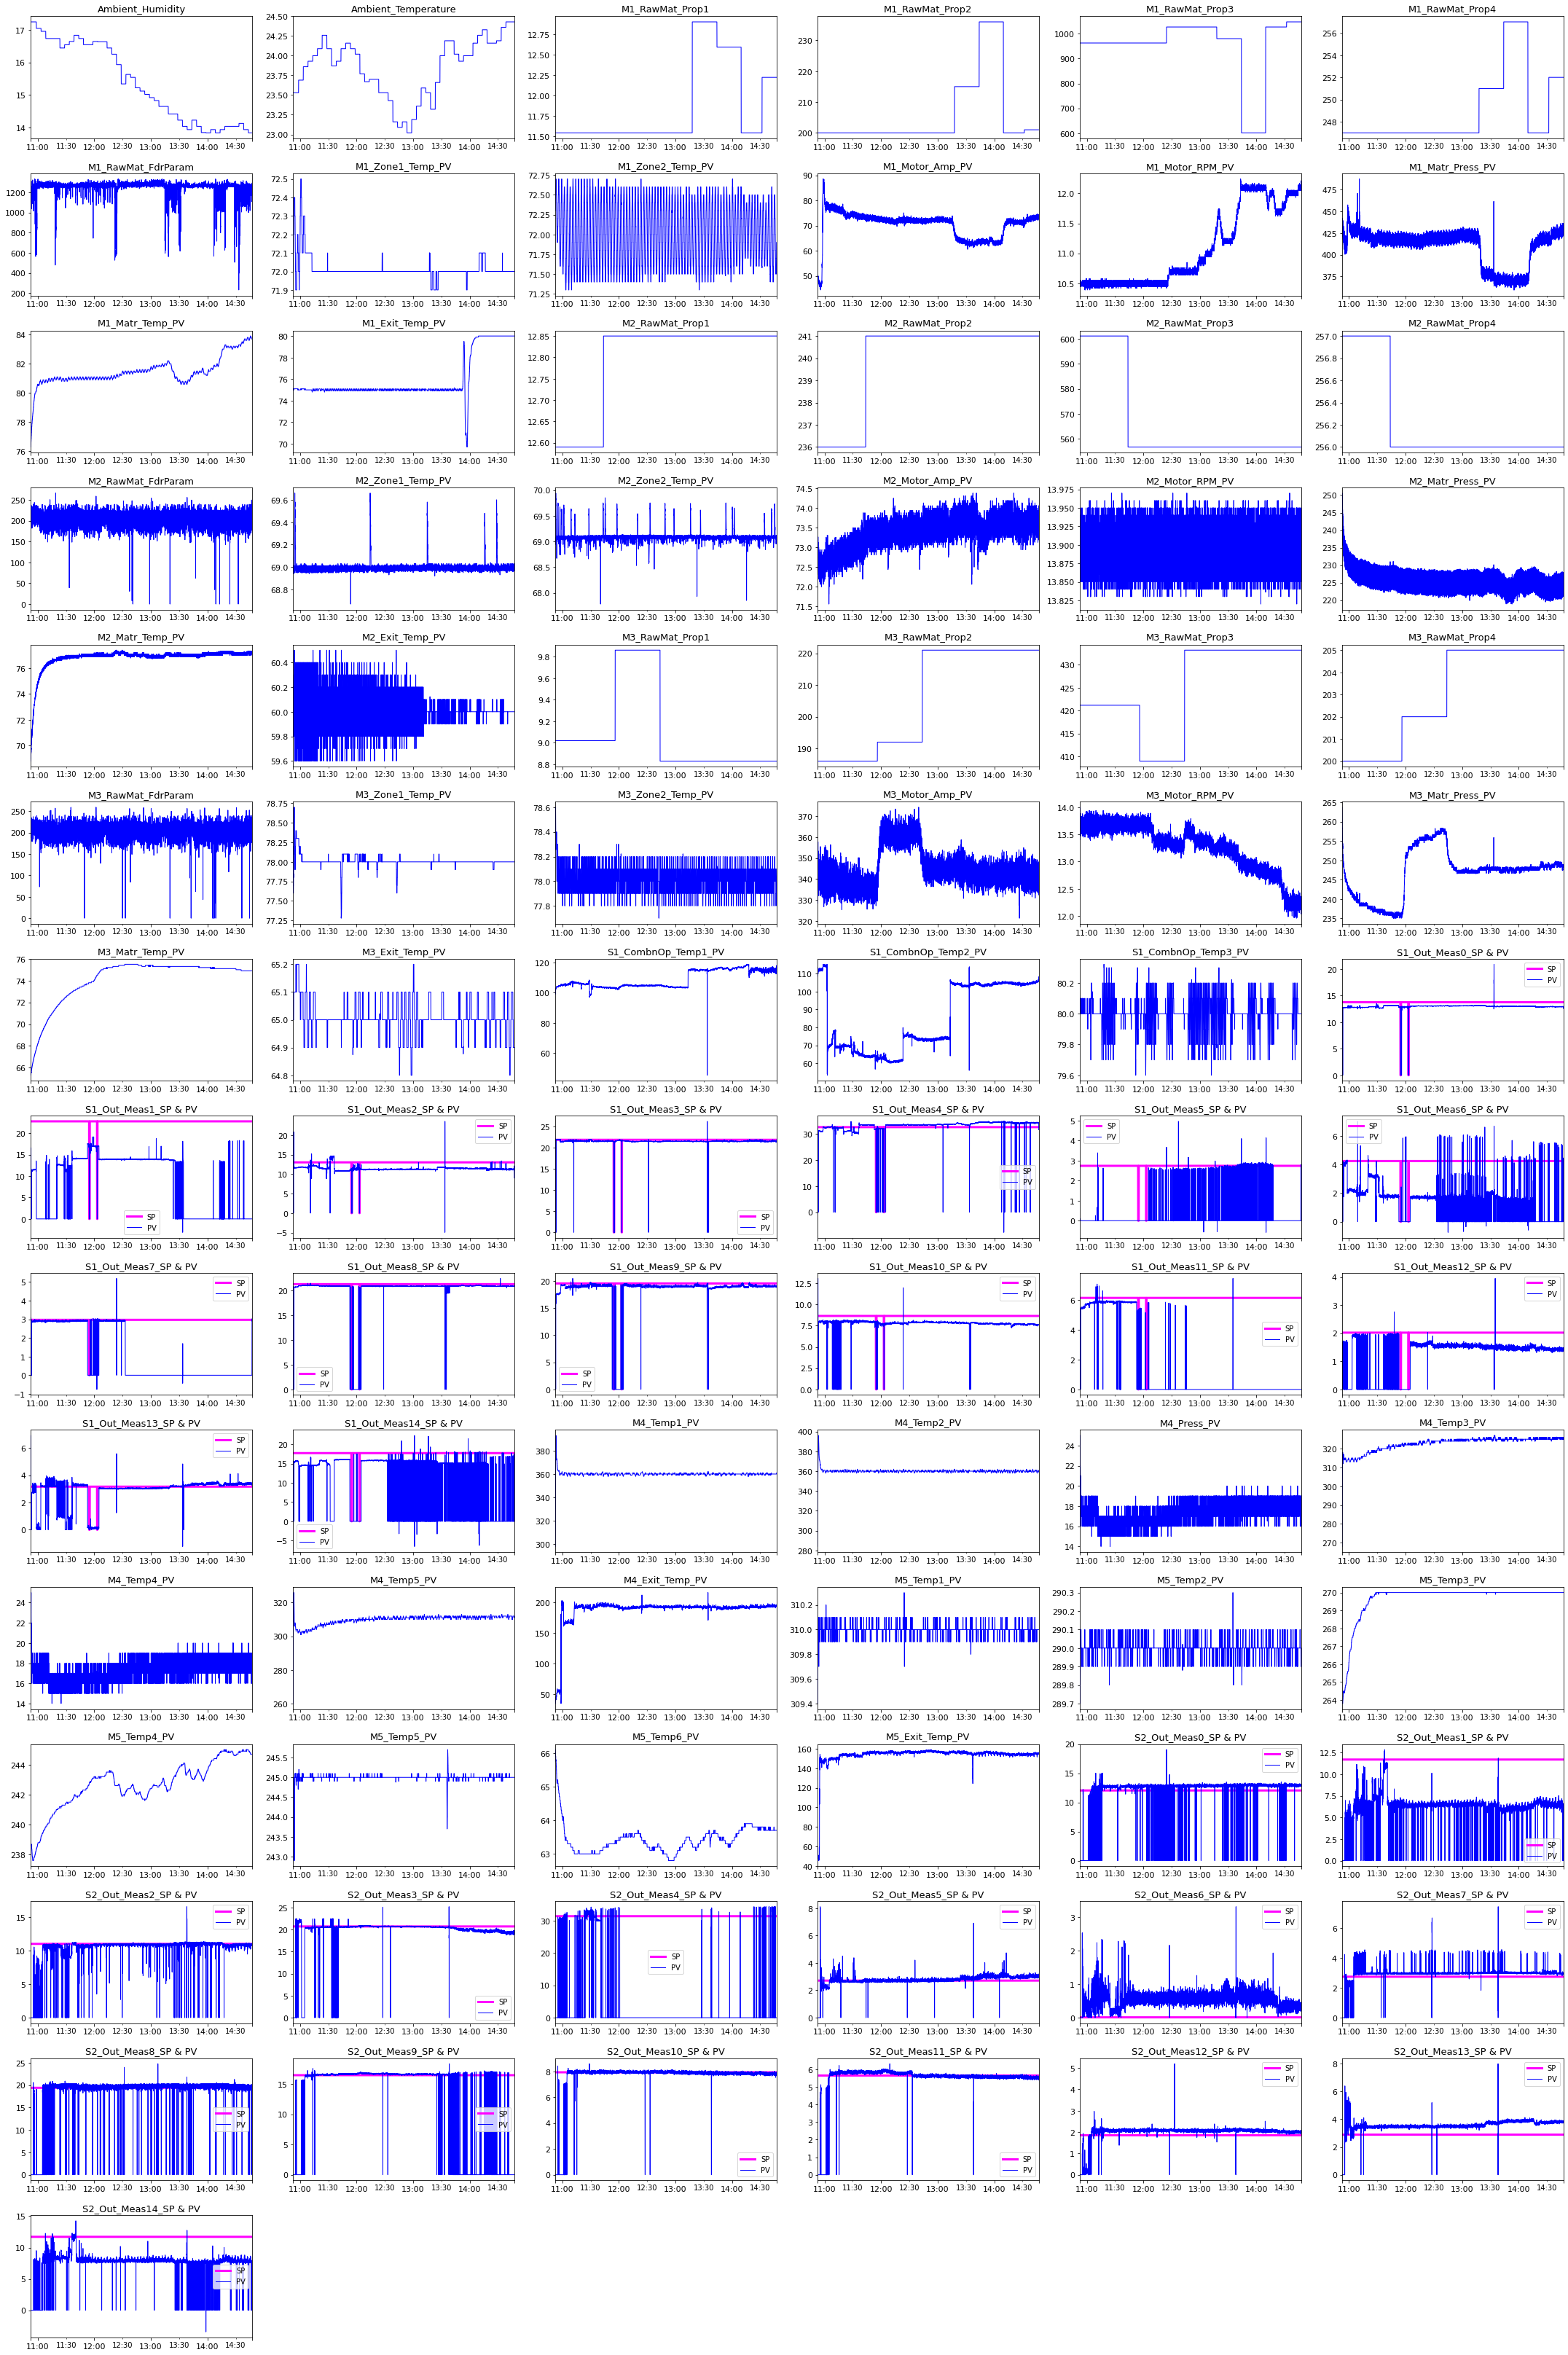

In [52]:
def plot_trends(df,nrow,ncol):
  # Generate plots for all columns, with PV and SP columns on the same subplots 
  PV_list = [col for col in df.columns if 'Meas' in col and '_PV' in col]
  plotcol_list=df.columns.drop(PV_list)
  gspec=gridspec.GridSpec(nrow,ncol)
  fig=plt.figure()
  fig.set_size_inches([5*ncol,3*nrow])
  count=0
  for i in range(0,nrow):
      for j in range(0,ncol):
          count+=1
          if count>df.shape[1]-len(PV_list):
              break
          thisplot=plt.subplot(gspec[i,j])
          this_col=plotcol_list[count-1]
          if 'SP' in this_col:
            PV_col = this_col[:len(this_col)-2] + 'PV'
            df[this_col].plot(c='magenta',linewidth=3,label='SP',legend=True)
            ax=thisplot.figure.gca()
            df[PV_col].plot(c='b',linewidth=1,ax=ax,label='PV',legend=True)
            this_col = this_col + ' & PV'
          else:  
            df[this_col].plot(linewidth=1,c='b')
          thisplot.figure.tight_layout(h_pad=1.5)
          thisplot.set_title(f"{this_col}",fontsize=13)
          thisplot.tick_params(axis='y', labelsize=11)
          thisplot.tick_params(axis='x', labelsize=11)     

plot_trends(df,15,6)

<p align="justify">Some observations regarding the above plots:

*   Most of the variables have highly noisy signals, with some having intermittent spikes and dips.
*   SP trends for all 15 S1 measurements show transient dips to 0.0 between 11:54:27 and 11:55:01 (approx 35 secs) and between 12:02:50 and 12:03:10 (approx 20 secs). Multiples dips observed in the S2 measurement sensors (not just during the 2 instances observed for the S1 sensors. 
SPECULATION: the 0.0-dips may be due to instances of power supply loss to the sensors, issues with the data-logging tool used by the production plant, interference from a common external source, or potential sensor reliability issues.
PROPOSAL: to obtain some useful information about the S1 and S2 trends, might consider missing value imputations for the instances of the 0.0-dips
*   Data spikes/dips in multiple measurements, e.g.: M4_Press_PV, M5_Temp2_PV, M2_Motor_RPM_PV, M2_Exit_Temp_PV. These spikes/dips could be due to signal noise. Ranges for these distortions appear to be small compared to the range of the signals themselves.
*   Some S1 & S2 meas. PV's are not able to consistently track their SP's, e.g.: S1_Out_Meas10, S1_Out_Meas14, S2_Out_Meas0, S2_Out_Meas1, S2_Out_Meas6, S2_Out_Meas13, S2_Out_Meas14
*   Disturbance propagated through multiple S1_Meas sensors between 13:33:37 and 13:33:47 (10 secs)
*   The corruption of these signals by noise and spikes will impact the model quality that can be trained for the 15 Stage 1 measurements.</p>







---------------------------------------------------------------------------

**REMOVAL OF SPIKES IN VARIABLES' DATA ARRAY**

<p align="justify">Next step is to take a closer look at individual plots, and attempt do some clean-up of those with heavy spikes/dips. Need to clean-up these variables before further analyses can be performed on them.

Will first define a function for enlarged plot of any chosen df column. From the enlarged plots, will determine the individual clip limits for the plots with spikes/dips.

Next, will define functions for removing these spikes/dips and interpolating. Will implement the idea of the Forwards-Backwards Exponential Weighted Moving Average (FBEWMA) filter presented in stackoverflow post: https://stackoverflow.com/questions/37556487/remove-spikes-from-signal-in-python. A description of the FBEWMA algorithm can also be found [here](http://connor-johnson.com/2014/02/01/smoothing-with-exponentially-weighted-moving-averages/)).  The functions defined below are based on python codes copied from the post.

NOTE: Since the scope of this project's objective covers the 15 Stage 1 output measurements, and not the Stage 2 output measurements, the Stage 1 measurements and all other variables upstream of the Stage 1 Combiner will be the focus of the de-spiking task. The assumption here is that since there is no mention of a recycle flow from Stage 2 back to Stage 1 in the process description, all variables downstream of the Stage 1 Combiner will have no effect on the Stage 1 output measurements.</p>

In [53]:
# Define function for individual plots. This function enables a magnified view of each variable's plot,
# to help determine the locations and magnitudes of the spikes in each plot, as well as other parameters
# required by the FBEWMA filter functions defined below. 
def plot_big(df_in,linewidth=1):
  global fig
  fig=plt.figure()
  fig.set_size_inches([20,8])
  df_in.plot(linewidth=linewidth,c='b')
  fig.tight_layout(h_pad=1.0)
  col_name=df_in.name
  fig.gca().set_title(f"{col_name}",fontsize=15)
  fig.gca().tick_params(axis='y', labelsize=15)
  fig.gca().tick_params(axis='x', labelsize=15)
  
# Define functions for clipping/interpolation using the FBEWMA filter algorithm.
# DELTA - Distance away from the FBEWMA that data should be removed. 
# HIGH_CLIP - clip data above this value:
# LOW_CLIP - clip data below this value:
# SPAN - How many samples to run the FBEWMA over.
def clip_data(unclipped, high_clip, low_clip):
    ''' Clip unclipped between high_clip and low_clip. 
    unclipped contains a single column of unclipped data.'''
    # convert to np.array to access the np.where method
    np_unclipped = np.array(unclipped)
    # clip data above HIGH_CLIP or below LOW_CLIP
    cond_high_clip = (np_unclipped > high_clip) | (np_unclipped < low_clip)
    np_clipped = np.where(cond_high_clip, np.nan, np_unclipped)
    return pd.Series(np_clipped)
    
def ewma_fb(df_column, span):
    ''' Apply forwards, backwards exponential weighted moving average (EWMA) to df_column. '''
    # Forwards EWMA.
    fwd = pd.Series.ewm(df_column, span=span).mean()
    # Backwards EWMA.
    bwd = pd.Series.ewm(df_column[::-1],span=10).mean()
    # Add and take the mean of the forwards and backwards EWMA.
    stacked_ewma = np.vstack(( fwd, bwd[::-1] ))
    fb_ewma = np.mean(stacked_ewma, axis=0)
    return fb_ewma

def remove_outliers(spikey, fbewma, delta):
    ''' Remove data from df_spikey that is > delta from fbewma. '''
    np_spikey = np.array(spikey)
    np_fbewma = np.array(fbewma)
    cond_delta = (np.abs(np_spikey-np_fbewma) > delta)
    np_remove_outliers = np.where(cond_delta, np.nan, np_spikey)
    return pd.Series(np_remove_outliers,index=df.index)
        
def de_spike(df_in,HIGH_CLIP,LOW_CLIP,SPAN,DELTA,init_pad=False):
    df=df_in.copy(deep=True)
    NAME = df.name
    THE_INDEX = df.index
    df['y_clipped'] = clip_data(df.tolist(), HIGH_CLIP, LOW_CLIP)
    df['y_ewma_fb'] = ewma_fb(df['y_clipped'], SPAN)
    df['y_remove_outliers'] = remove_outliers(df['y_clipped'].tolist(), df['y_ewma_fb'].tolist(), DELTA)
    df['y_interpolated'] = df['y_remove_outliers'].interpolate()
    if init_pad:       # if head values in array are NaN, back-pad array with first good value
      df_pad = df['y_interpolated']
      init_val = df_pad[~df_pad.isnull()][0]
      df['y_interpolated'] = pd.Series(np.where(df_pad.isnull(),init_val,df_pad),index=THE_INDEX)
    df['y_interpolated'].name=NAME
    return df['y_interpolated']
    

In [54]:
# Define dict for FBEWMA despiking filter parameters
# The dict is defined based on the review of the individual variable plots implemented outside this notebook.
despike_dict={}
despike_dict['VARIABLE']=['M1_RawMat_FdrParam','M1_Matr_Press_PV','M2_RawMat_FdrParam','M3_RawMat_FdrParam','S1_CombnOp_Temp1_PV',
                          'S1_CombnOp_Temp2_PV','S1_Out_Meas0_PV','S1_Out_Meas0_SP','S1_Out_Meas1_PV','S1_Out_Meas1_SP','S1_Out_Meas2_PV',
                          'S1_Out_Meas2_SP','S1_Out_Meas3_PV','S1_Out_Meas3_SP','S1_Out_Meas4_PV','S1_Out_Meas4_SP','S1_Out_Meas5_PV',
                          'S1_Out_Meas5_SP','S1_Out_Meas6_PV','S1_Out_Meas6_SP','S1_Out_Meas7_PV','S1_Out_Meas7_SP','M2_Motor_Amp_PV',
                          'S1_Out_Meas8_PV','S1_Out_Meas8_SP','S1_Out_Meas9_PV','S1_Out_Meas9_SP','S1_Out_Meas10_PV','S1_Out_Meas10_SP',
                          'S1_Out_Meas11_PV','S1_Out_Meas11_SP','S1_Out_Meas12_PV','S1_Out_Meas12_SP','S1_Out_Meas13_PV','S1_Out_Meas13_SP',
                          'S1_Out_Meas14_PV','S1_Out_Meas14_SP','M2_Zone1_Temp_PV','M2_Zone2_Temp_PV']
despike_dict['HIGH_CLIP']=[1350,470,250,240,120,120,15,15,19,30,16,16,23,23,35,35,2.9,2.9,4.3,4.3,3.5,3.5,74.5,21.2,22,20,20,8.25,8.75,6.1,6.3,
                           2.05,2.05,4.1,4.1,16.3,18,69.8,70]
despike_dict['LOW_CLIP']=[500,360,120,160,90,50,10,10,10,10,10,10,20,20,28,28,2,2,1.3,1.3,2.8,2.8,71.5,20.7,20.7,17,17,7.1,7.1,5,5,1.25,1.25,0.05,
                          0.05,14,14,68.8,69.05]
despike_dict['SPAN']=[5,5,5,5,5,5,10,10,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,10,10,5,5,5,5,5,5,5,5,5,5]
despike_dict['DELTA']=[50,10,80,50,20,5,0.2,0.2,1,1,0.2,0.2,0.05,0.05,1,1,0.5,0.5,0.1,0.1,1,1,0.1,0.1,0.1,0.08,0.08,0.05,0.05,0.1,0.1,0.02,0.02,
                       0.4,0.4,0.05,0.05,0.2,0.1]
despike_dict['INIT_PAD']=[False,False,False, False,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False,False,
                          False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False]


<p align="justify">From a closer examination of individual plots, there are some signals which, though noisy/spiky, have weakly-stationary trends for the time range of the dataset. Their stationarity was also observed from the plots of their rolling averages (calculated to help suppress noise and highlight any longer-term trends). Additionally, the noise/spike ranges of these signals are too small wrt to the order of magnitude of each signal to be considered meaningful (e.g. 0.3 deg noise amplitude for ~300 deg signal).  Consideration here is that these signals are not likely to provide much useful insight. These signals will be dropped from subsequent analyses and modeling calculations. The signals are:</p>

*   M2_Motor_RPM_PV
*   M2_Exit_Temp_PV
*   M3_Exit_Temp_PV
*   S1_CombnOp_Temp3_PV
*   M5_Temp1_PV
*   M5_Temp2_PV




---------------------------------------------------------------------------

**RE-BUILDING & RE_PLOTTING OF DE-SPIKED DATAFRAME**

In [55]:
statnry_col = ['M2_Motor_RPM_PV','M2_Exit_Temp_PV','M3_Exit_Temp_PV','S1_CombnOp_Temp3_PV','M5_Temp1_PV','M5_Temp2_PV']
def despiked_df():
    df_nospke = np.zeros((len(df),1))
    for col in df.columns:
        if col in despike_dict['VARIABLE']:
            i = despike_dict['VARIABLE'].index(col)
            df_nospke=np.concatenate([df_nospke,de_spike(df[col],
                                                        despike_dict['HIGH_CLIP'][i],
                                                        despike_dict['LOW_CLIP'][i],
                                                        despike_dict['SPAN'][i],
                                                        despike_dict['DELTA'][i],
                                                        despike_dict['INIT_PAD'][i]).values.reshape(len(df[col]),1)],axis=1)
        else:
            df_nospke=np.concatenate([df_nospke,df[col].values.reshape(len(df[col]),1)],axis=1)
    df_nospke = np.delete(df_nospke,0,1)
    df_nospke = pd.DataFrame(df_nospke,index=df.index,columns=df.columns)
    # Create some calculated features to be used in the system identification
    df_nospke['M1_RawMat_PropSum'] = df_nospke[[f"M1_RawMat_Prop{i}" for i in range(1,5)]].sum(axis=1)
    df_nospke['M2_RawMat_PropSum'] = df_nospke[[f"M2_RawMat_Prop{i}" for i in range(1,5)]].sum(axis=1)
    df_nospke['M3_RawMat_PropSum'] = df_nospke[[f"M3_RawMat_Prop{i}" for i in range(1,5)]].sum(axis=1)
    return df_nospke

df_nospke = despiked_df()

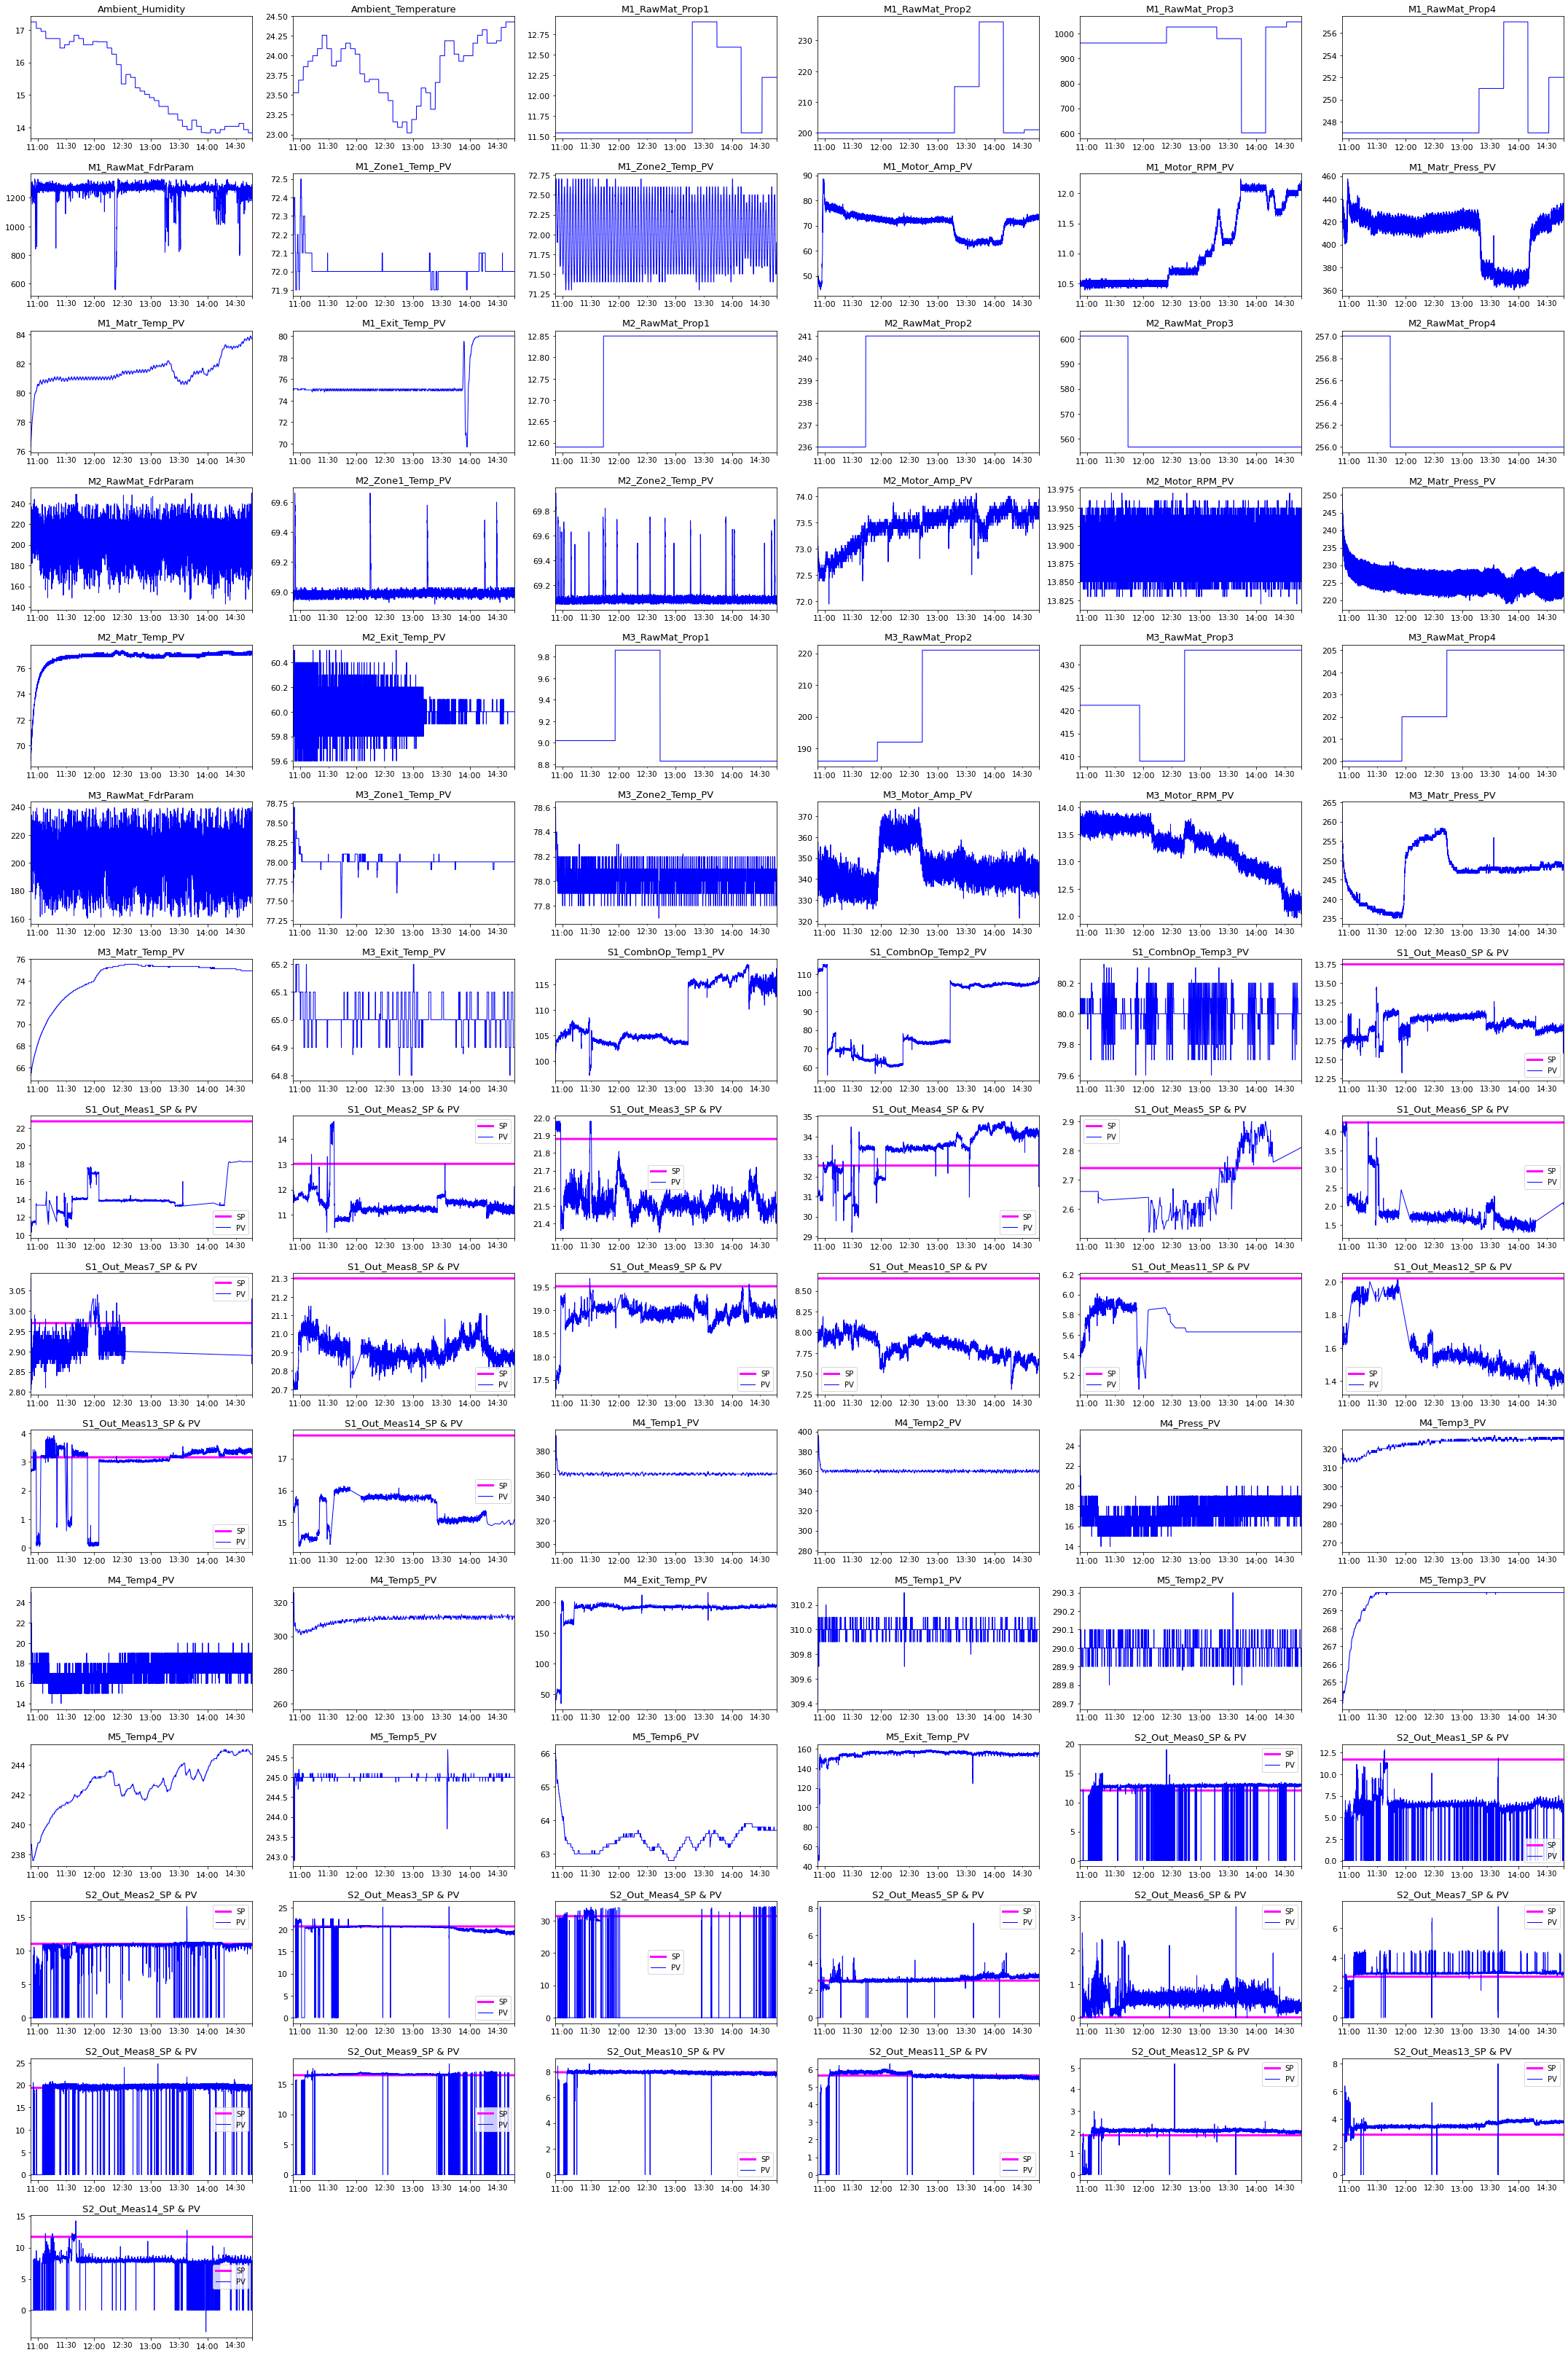

In [56]:
# Plot de-spiked dataframe
plot_trends(df_nospke[df.columns],15,6)

COMMENTS ON DE-SPIKED PLOTS

<p align="justify">From reviewing the de-spiked plots for the 15 Stage 1 output measurements, it can be seen that the removal of the spikes has made just some moderate improvement to the quality of the 15 variables' dataset. The datasets are still noisy and have regions of discontinuities. Although the FBEWMA filter algorithm has attempted to remove the spikes in the dataset, some of the 15 output measurements have such extensive periods of spikes (e.g. S1_Out_Meas1_PV, S1_Out_Meas7_PV, S1_Out_Meas13_PV, etc), and hence missing data, that de-spiking their datasets does not do much to help salvage the preservation of useful information on the process dynamics of these corrupted measurements. 

No data pre-processing/cleaning algorithm can adequately out-perform having a reliable sensor or data-logging tool during a process test-run's data gathering step. It is therefore not expected that well-performing models will be obtainable for some of these measurements, such as the 2 examples listed above, during the model training steps. However, for the purpose of skill-building in this project, all 15 measurements will be included in the subsequent EDA and model training.</p>

---------------------------------------------------------------------------

# DATAFRAME EDA

Recall the primary objective is to predict measurements of output from Stage 1 (consisting of Machines 1, 2, 3, and the Combiner), hence predict S1_Out_Meas0_PV to S1_Out_Meas14_PV from the production line's various input data. We therefore seek to build model(s) having S1_Out_Meas0_PV to S1_Out_Meas14_PV as the target variables. The plots of the 15 measurements are shown below:

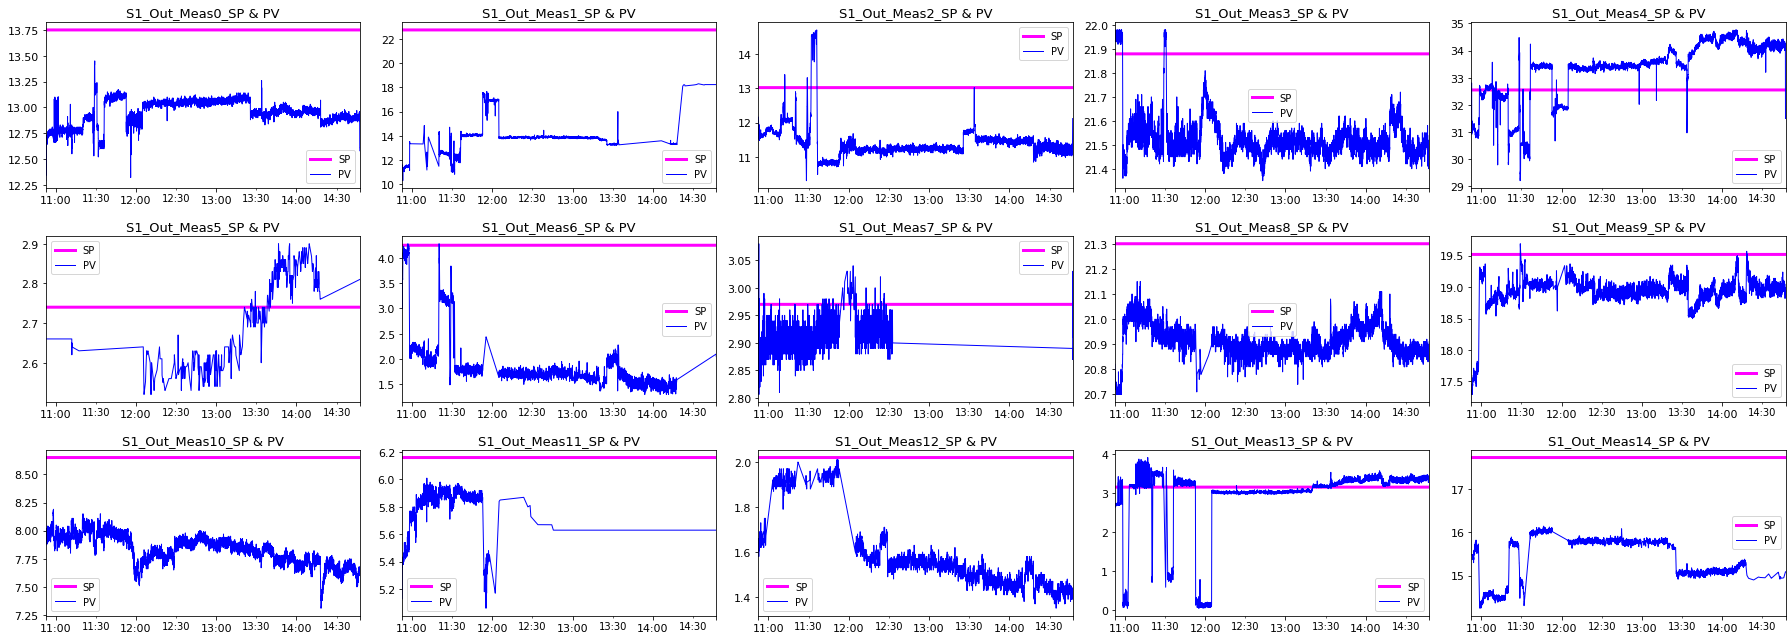

In [57]:
plot_trends(df_nospke[[col for col in df_nospke.columns if 'S1_Out_Meas' in col]],3,5)

<p align="justify">Note that even though the setpoint (SP) data for the Stage 1 output PV measurements have been included in the dataset, a review of the plots of the combined SP/PV trends for the 15 output measurements indicates that the SP's trends are all flat-lined (with the exception of the periods of signal dips).  Steps moves do not appear to have been made on any of the SP's during the production test-run. Being flat-lined, the SP's will not be useful in providing information about the PV's or insight to the process. The SP variables will therefore be excluded from subsequent analyses.

The problem statement indicates that the manufacturing process on the production line is high-speed and continuous. As stated above, the scope of subsequent analyses will be restricted to the Stage 1 output and the upstream sections of the production line. Hence, subsequent EDA for modeling the Stage 1 outputs will not include the Stage 2 variables as potential input features. EDA will therefore be restricted to the following variables as potential features (Note that some other variables have already been identified above for removal due to lack of signficant movement in their trends):</p>

  
|                     | Variables for EDA  |                    |
|---------------------|--------------------|--------------------|
| Ambient_Humidity    | M1_Matr_Temp_PV    | M3_RawMat_Prop1    |
| Ambient_Temperature | M1_Exit_Temp_PV    | M3_RawMat_Prop2    |
| M1_RawMat_Prop1     | M2_RawMat_Prop1    | M3_RawMat_Prop3    |
| M1_RawMat_Prop2     | M2_RawMat_Prop2    | M3_RawMat_Prop4    |
| M1_RawMat_Prop3     | M2_RawMat_Prop3    | M3_RawMat_FdrParam |
| M1_RawMat_Prop4     | M2_RawMat_Prop4    | M3_Zone1_Temp_PV   |
| M1_RawMat_FdrParam  | M2_RawMat_FdrParam | M3_Zone2_Temp_PV   |
| M1_Zone1_Temp_PV    | M2_Zone1_Temp_PV   | M3_Motor_Amp_PV    |
| M1_Zone2_Temp_PV    | M2_Zone2_Temp_PV   | M3_Motor_RPM_PV    |
| M1_Motor_Amp_PV     | M2_Motor_Amp_PV    | M3_Matr_Press_PV   |
| M1_Motor_RPM_PV     | M2_Matr_Press_PV   | M3_Matr_Temp_PV    |
| M1_Matr_Press_PV    | M2_Matr_Temp_PV    | S1_CombnOp_Temp1_PV|
| S1_CombnOp_Temp2_PV |                    |                    |

---------------------------------------------------------------------------

**MUTUAL INFORMATION**

<p align="justify">Before diving into the correlation analyses, will first compute the Mutual Information (MI) dataframe between the intended model targets and input features to help weed-out the target-feature relationships not worth exploring further. MI is a lot like correlation in that it measures a relationship between 2 variables. The advantage of  MI is that it can detect any kind of relationship, while correlation only detects linear relationships. A short simple description of MI can be found [here](https://simple.wikipedia.org/wiki/Mutual_information).

Any MI value for a target-input feature target = 0.0 will be dropped from the feature set.</p>

In [58]:
# Define function for calculating Mutual Information (MI) between any 2 variables
def mi_score(X,y):
  X=pd.DataFrame(X)
  return mutual_info_regression(X,y,discrete_features=False)[0]

# Create dataframe of MI scores between targets and input features
downstrm_col = [col for col in df_nospke.columns if 'M4_' in col or 'M5_' in col or 'S2_' in col]
#feat_list = df_nospke.columns.difference(PV_col_list+SP_col_list+downstrm_col+statnry_col)
feat_list = df.columns.difference(PV_col_list+SP_col_list+downstrm_col+statnry_col)
df_mi_scores = pd.DataFrame(index=feat_list)
for col in PV_S1_col_list:
  mi_list = []
  for idx in feat_list:
    mi_list.append(mi_score(df_nospke[idx],df_nospke[col]))
  df_mi_scores = pd.concat([df_mi_scores,pd.Series(mi_list,index=feat_list,name=col)],axis=1)  
display(df_mi_scores.head())

S1_Out_Meas0_PV  S1_Out_Meas1_PV  S1_Out_Meas2_PV  \
Ambient_Humidity            1.045084         1.731605         0.991013   
Ambient_Temperature         0.966692         1.694495         0.930448   
M1_Exit_Temp_PV             0.345140         0.808549         0.236154   
M1_Matr_Press_PV            0.374661         0.686068         0.392477   
M1_Matr_Temp_PV             0.677416         1.503062         0.646372   

                     S1_Out_Meas3_PV  S1_Out_Meas4_PV  S1_Out_Meas5_PV  \
Ambient_Humidity            0.477001         1.456374         1.882121   
Ambient_Temperature         0.441629         1.332468         1.787047   
M1_Exit_Temp_PV             0.096163         0.545284         0.799316   
M1_Matr_Press_PV            0.092416         0.447858         0.697274   
M1_Matr_Temp_PV             0.352928         1.060837         1.544049   

                     S1_Out_Meas6_PV  S1_Out_Meas7_PV  S1_Out_Meas8_PV  \
Ambient_Humidity            1.146138         2.227538         0.641982   
Ambient_Temperature         1.095428         2.185425         0.647629   
M1_Exit_Temp_PV             0.351598         1.182696         0.212144   
M1_Matr_Press_PV            0.414286         0.833824         0.211218   
M1_Matr_Temp_PV             1.030701         2.231143         0.465045   

                     S1_Out_Meas9_PV  S1_Out_Meas10_PV  S1_Out_Meas11_PV  \
Ambient_Humidity            0.656991          0.926135          1.412505   
Ambient_Temperature         0.641351          0.798001          1.132979   
M1_Exit_Temp_PV             0.147244          0.383390          0.320778   
M1_Matr_Press_PV            0.147168          0.251043          0.282271   
M1_Matr_Temp_PV             0.528549          0.579856          0.903080   

                     S1_Out_Meas12_PV  S1_Out_Meas13_PV  S1_Out_Meas14_PV  
Ambient_Humidity             1.326940          1.270108          1.488473  
Ambient_Temperature          1.189108          1.188601          1.433423  
M1_Exit_Temp_PV              0.410119          0.386650          0.568620  
M1_Matr_Press_PV             0.377041          0.354377          0.621952  
M1_Matr_Temp_PV              0.902860          0.800900          1.105702

---------------------------------------------------------------------------

**MI HEATMAP**

The MI dataframe for the the target-feature matrix provides numerical insight to the relationships amongst the variables. However, to aid easier identification of the strong/weak/non-existent MI relationships, the dataframe's heatmap will be plotted. A reminder that an MI of 0.0 (red) shows a non-existent relationship; high MI values have colours transitioning towards green. A value of 1.0 and above will be denoted with a green colour.

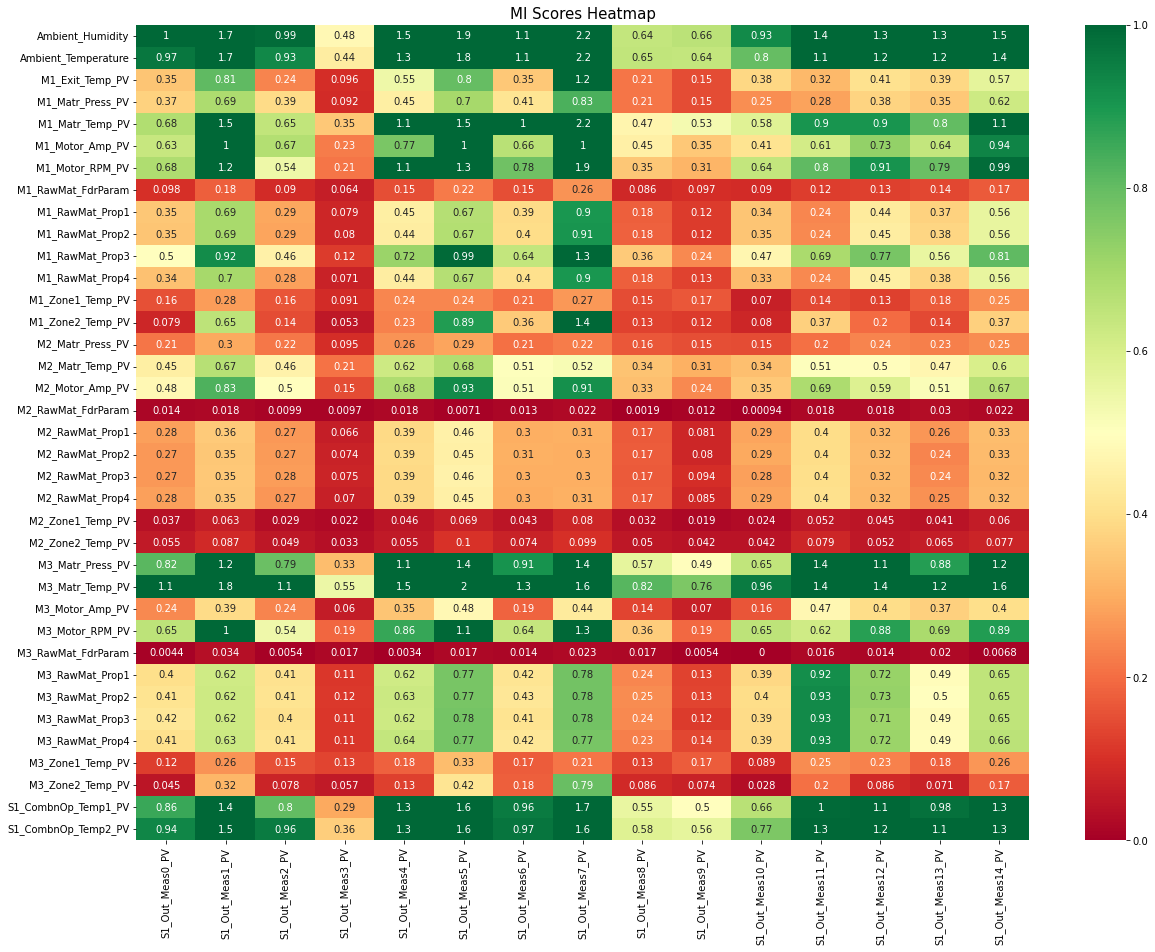

In [59]:
# Examine heatmap for MI score dataframe
plt.figure(figsize=(20,15))
g1 = sns.heatmap(df_mi_scores,annot=True,cmap="RdYlGn",vmin=0.0,vmax=1.0)
g1.set_title('MI Scores Heatmap',fontsize=15);

<p align="justify">From the MI Scores heatmap, it would appear information on both Ambient Temperature and Humidity have significant impact in reducing the uncertainty in the 12 out of the 15 Stage 1 output measurements. Other impactful features across the board appear to be the Machine 1 and Machine 3 Motor variables and machine material/exit conditions. Although Machine 2 has some uncertainty reduction impact on some Stage 1 outputs, overall, it does not appear to be as strong as Machines 1 & 3. This could be due to relatively less movement in the Machine 2 variables (Motor, Raw Material, etc) compared to the other 2 machines.

No target/feature pair has a 0.0  MI score, however, there are numerous low values. S1_Out_Meas3/8/9_PV appear to not have significant uncertainty reduction from the input features.

The significant impact from the 2 Stage 1 Combiner temperatures is not surprising since the temperatures are directly upstream of the output measurement points. However, these 2 temperatures are downstream of the other input features; some relationship/correlation is therefore to be expected between the 2 temperatures and the upstream variables. The 2 Combiner temperatures will therefore not be included as independent input features in the list during the model training steps.

Since the heatmap above examines uncertainty reduction amongst the variables, and not correlation strength with the Stage 1 outputs, care should be taken not to interpret the numbers above as the key criteria for feature selection. The MI scores, for example, do not provide insight to the relationship direction (i.e. positive or negative) in the target-feature pairs.

Next, will examine the correlation matrices amongst the variables: both between the targets and the input features, and amongt the features</p>

---------------------------------------------------------------------------

**CROSS-CORRELATION ANALYSIS**

In [60]:
# Create dataframe of cross-correlations between targets and input features
df_corr = pd.DataFrame(index=feat_list)
for col in PV_S1_col_list:
  corr_list = []
  for idx in feat_list:
    corr_list.append(df_nospke[col].corr(df_nospke[idx], method="pearson"))
  df_corr = pd.concat([df_corr,pd.Series(corr_list,index=feat_list,name=col)],axis=1)  
display(df_corr.head())


S1_Out_Meas0_PV  S1_Out_Meas1_PV  S1_Out_Meas2_PV  \
Ambient_Humidity           -0.185675        -0.322630         0.143655   
Ambient_Temperature        -0.386533         0.339416         0.114696   
M1_Exit_Temp_PV            -0.166125         0.571817        -0.089981   
M1_Matr_Press_PV           -0.115534         0.221261        -0.029320   
M1_Matr_Temp_PV             0.138331         0.707380        -0.207662   

                     S1_Out_Meas3_PV  S1_Out_Meas4_PV  S1_Out_Meas5_PV  \
Ambient_Humidity            0.314852        -0.764211        -0.695641   
Ambient_Temperature         0.002781         0.072198         0.634101   
M1_Exit_Temp_PV            -0.057358         0.431648         0.624812   
M1_Matr_Press_PV            0.138798        -0.439836        -0.608493   
M1_Matr_Temp_PV            -0.355197         0.555724         0.421687   

                     S1_Out_Meas6_PV  S1_Out_Meas7_PV  S1_Out_Meas8_PV  \
Ambient_Humidity            0.499144         0.430683        -0.008129   
Ambient_Temperature         0.085630        -0.000830         0.251621   
M1_Exit_Temp_PV            -0.152967        -0.248626         0.030037   
M1_Matr_Press_PV            0.306064         0.185271        -0.225054   
M1_Matr_Temp_PV            -0.423209        -0.237419        -0.007881   

                     S1_Out_Meas9_PV  S1_Out_Meas10_PV  S1_Out_Meas11_PV  \
Ambient_Humidity           -0.097300          0.605875          0.439478   
Ambient_Temperature         0.141143         -0.361324          0.045100   
M1_Exit_Temp_PV             0.134019         -0.607186         -0.210449   
M1_Matr_Press_PV            0.008656          0.285626          0.237744   
M1_Matr_Temp_PV             0.402291         -0.586051         -0.158025   

                     S1_Out_Meas12_PV  S1_Out_Meas13_PV  S1_Out_Meas14_PV  
Ambient_Humidity             0.841584         -0.418890          0.241148  
Ambient_Temperature          0.061776          0.052754         -0.470955  
M1_Exit_Temp_PV             -0.441865          0.233577         -0.347287  
M1_Matr_Press_PV             0.428069         -0.242972          0.167447  
M1_Matr_Temp_PV             -0.515798          0.264956         -0.161246

Next, similar to the MI dataframe, will plot the cross-correlation heatmap to help highlight noteworthy correlations. For this heatmap, high correlation magnitudes (whether positive or negative) transition towards the green colour, while low magnitudes transition towards red.

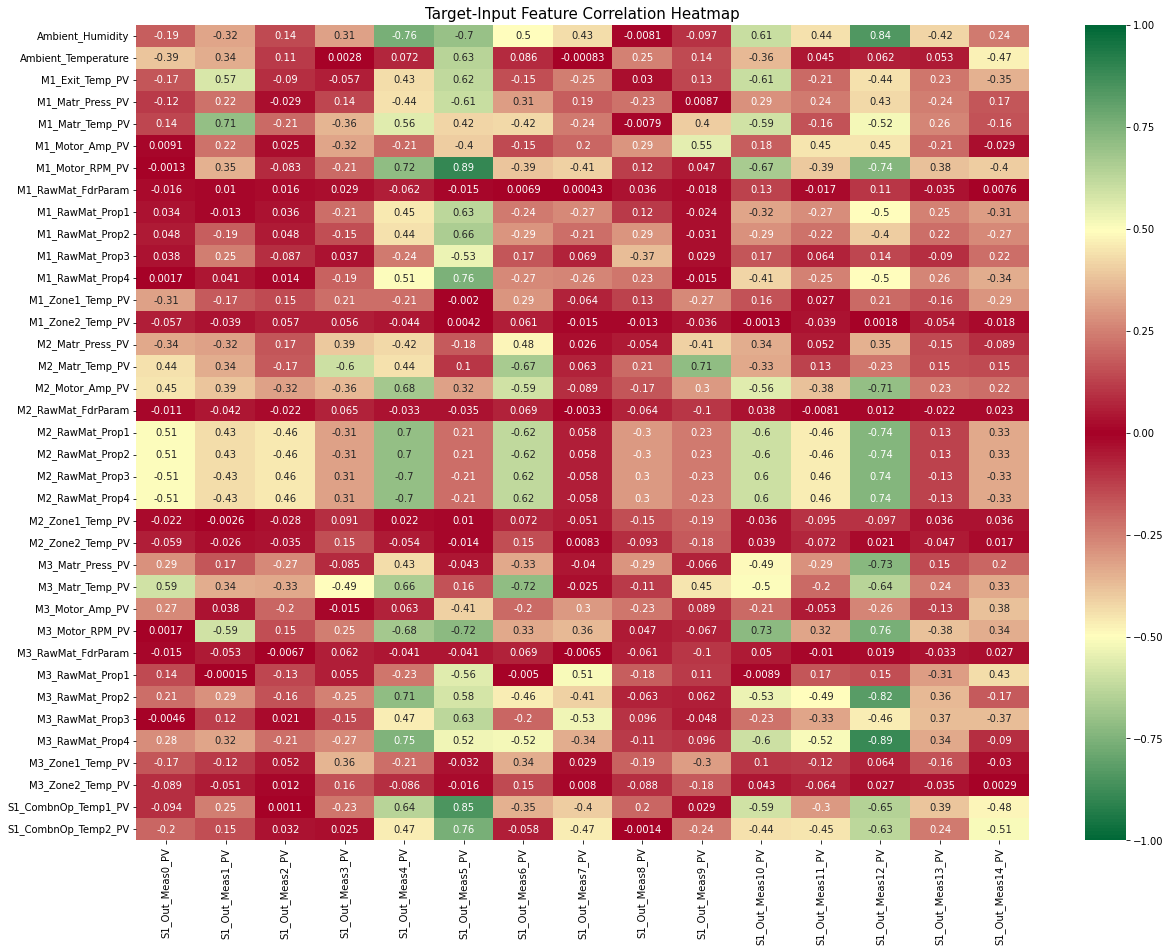

In [61]:
# Examine heatmap for Target-Feature Correlation dataframe
from matplotlib.colors import LinearSegmentedColormap
cmap = LinearSegmentedColormap.from_list(
    name='corrcmap', 
    colors=['#006837','#fffebe','#a50026','#fffebe','#006837']
)
plt.figure(figsize=(20,15))
g2 = sns.heatmap(df_corr,annot=True,cmap=cmap,vmin=-1.0,vmax=1.0)
g2.set_title('Target-Input Feature Correlation Heatmap',fontsize=15);

<p align="justify">From reviewing the heatmaps of the cross-correlations and the MI scores, it can be seen that though the heatmaps are not in complete alignment regarding target-input feature relationship strengths across all 15 Stage 1 outputs (e.g. the MI heatmap shows strong relationship between all 15 Stage 1 outputs and Ambient Temperature; correlation heatmap shows relationship strength in just 1 of the outputs), both heatmaps appear to be in alignment regarding which input features are showing relationship strength with at least some of the 15 target variables (e.g M1/M2/M3_Matr_Temp_PV) and which features are weak in relationship with all 15 target variables across the board (e.g. M1/M2/M3_RawMat_FdrParam).</p>

Next, will investigate cross-correlations amongst the features. If there are correlated features in the list, they should not both/all be included in the model trainings. Some mathematical transformations, e.g. summing the features, may be required.

In [62]:
# Calculate correlations amongst features
df_featcorr = pd.DataFrame(index=feat_list)
for col in feat_list:
  corr_list = []
  for idx in feat_list:
    corr_list.append(df_nospke[col].corr(df_nospke[idx], method="pearson"))
  df_featcorr = pd.concat([df_featcorr,pd.Series(corr_list,index=feat_list,name=col)],axis=1)  
display(df_featcorr.head())

Ambient_Humidity  Ambient_Temperature  M1_Exit_Temp_PV  \
Ambient_Humidity             1.000000            -0.197401        -0.530926   
Ambient_Temperature         -0.197401             1.000000         0.523745   
M1_Exit_Temp_PV             -0.530926             0.523745         1.000000   
M1_Matr_Press_PV             0.565678            -0.216512        -0.004307   
M1_Matr_Temp_PV             -0.649393             0.297221         0.725663   

                     M1_Matr_Press_PV  M1_Matr_Temp_PV  M1_Motor_Amp_PV  \
Ambient_Humidity             0.565678        -0.649393         0.373958   
Ambient_Temperature         -0.216512         0.297221         0.002999   
M1_Exit_Temp_PV             -0.004307         0.725663        -0.002584   
M1_Matr_Press_PV             1.000000         0.075464         0.673133   
M1_Matr_Temp_PV              0.075464         1.000000         0.259590   

                     M1_Motor_RPM_PV  M1_RawMat_FdrParam  M1_RawMat_Prop1  \
Ambient_Humidity           -0.906481            0.050588        -0.634965   
Ambient_Temperature         0.442081           -0.066236         0.260897   
M1_Exit_Temp_PV             0.636046           -0.086549         0.086599   
M1_Matr_Press_PV           -0.586460            0.019891        -0.824634   
M1_Matr_Temp_PV             0.628453           -0.038299         0.084999   

                     M1_RawMat_Prop2  ...  M3_Motor_RPM_PV  \
Ambient_Humidity           -0.530235  ...         0.821789   
Ambient_Temperature         0.190859  ...        -0.432849   
M1_Exit_Temp_PV             0.025919  ...        -0.762882   
M1_Matr_Press_PV           -0.868953  ...         0.280204   
M1_Matr_Temp_PV            -0.036090  ...        -0.782742   

                     M3_RawMat_FdrParam  M3_RawMat_Prop1  M3_RawMat_Prop2  \
Ambient_Humidity               0.071639         0.510488        -0.939665   
Ambient_Temperature           -0.047673        -0.257414         0.025870   
M1_Exit_Temp_PV               -0.048866        -0.306911         0.437078   
M1_Matr_Press_PV               0.042631         0.283921        -0.489604   
M1_Matr_Temp_PV               -0.089264        -0.275570         0.586667   

                     M3_RawMat_Prop3  M3_RawMat_Prop4  M3_Zone1_Temp_PV  \
Ambient_Humidity           -0.754554        -0.934318          0.190348   
Ambient_Temperature         0.185660        -0.032329         -0.051630   
M1_Exit_Temp_PV             0.398038         0.418021         -0.061554   
M1_Matr_Press_PV           -0.405306        -0.482539          0.072941   
M1_Matr_Temp_PV             0.441863         0.593622         -0.227009   

                     M3_Zone2_Temp_PV  S1_CombnOp_Temp1_PV  \
Ambient_Humidity             0.071170            -0.828224   
Ambient_Temperature         -0.016248             0.486684   
M1_Exit_Temp_PV             -0.022533             0.565970   
M1_Matr_Press_PV             0.036027            -0.642252   
M1_Matr_Temp_PV             -0.138366             0.507762   

                     S1_CombnOp_Temp2_PV  
Ambient_Humidity               -0.711060  
Ambient_Temperature             0.305315  
M1_Exit_Temp_PV                 0.497871  
M1_Matr_Press_PV               -0.484536  
M1_Matr_Temp_PV                 0.327240  

[5 rows x 37 columns]

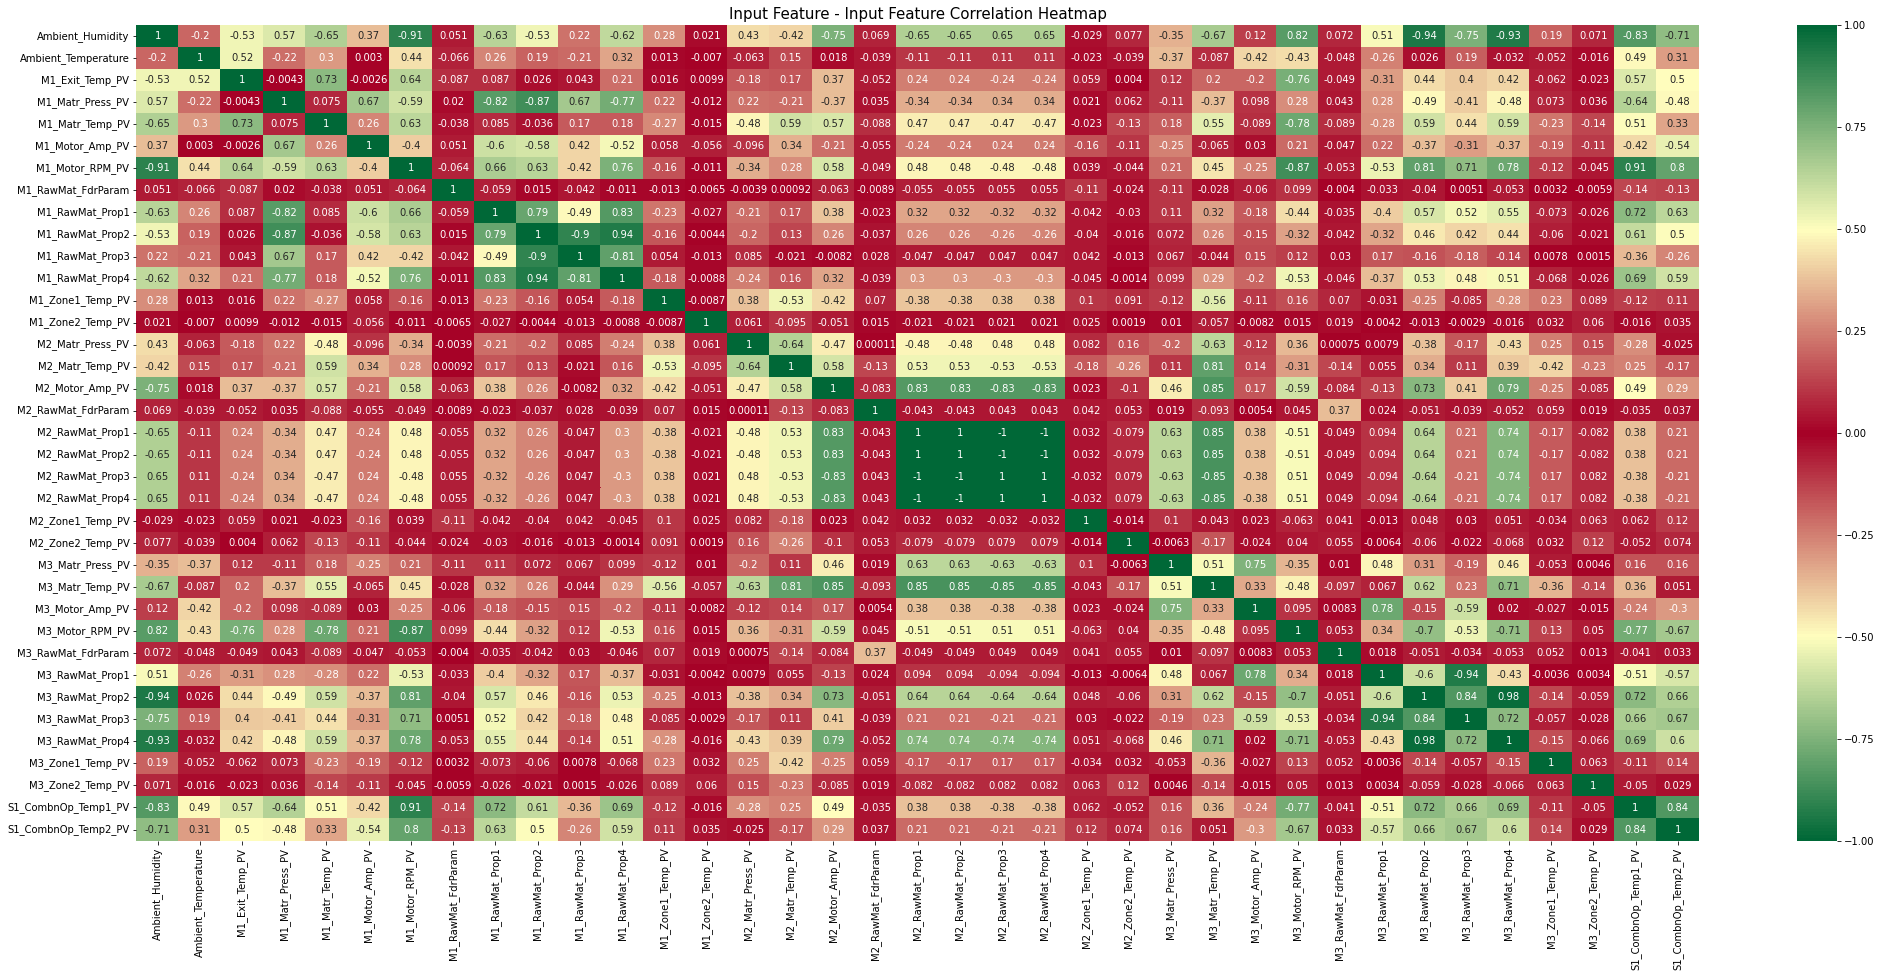

In [63]:
# Plot heatmap of features cross-correlation
plt.figure(figsize=(35,15))
g3 = sns.heatmap(df_featcorr,annot=True,cmap=cmap,vmin=-1.0,vmax=1.0)
g3.set_title('Input Feature - Input Feature Correlation Heatmap',fontsize=15);

<p align="justify">The input features cross-correlation heatmap shows significant correlations amongst numerous pairs of the features, e.g. Ambient Humidity/M1_Motor_RPM_PV, the M1-M3 RawMat_Prop1-Prop4 features with other features as well as with themselves, etc.

For each machine, the Prop1-Prop4 features show high correlation amongst themselves. In the [original naming](#scrollTo=FvIj9X8FAToz&line=1&uniqifier=1) of the features in the process description, there is no indication of if these Prop1-Prop4 variables are controlled (*.C.*) or uncontrolled (*.U.*) variables. However, the trends of these variables show perfect steps, suggesting these variables were manually adjusted during the production test run, and not continuously adjusted by a controller. It is possible the Prop1-Prop4 variables were the intended variables by the production line operators for making step moves during the test run, with the other variables in the dataset being the feed-forward or response variables. If this possibility is true, then the cross-correlation heatmap above suggests the step moves made during the test run are correlated, which does not allow for independence amongst the features, and is not ideal for accurate model identification.

In attempting to explain the cross-correlations amongst the other features, there is the need to again refer to the original naming of all the variables in the dataset. Some variables are denoted as controlled (*.C.*) variables, e.g. 'M1_Zone1_Temp_PV' (Machine1.Zone1Temperature.C.Actual), 'M2_Motor_RPM_PV' (Machine2.MotorRPM.C.Actual), etc, which suggests that these variables have controllers that are attempting to regulate their values at specific setpoints. These controllers will likely be using some uncontrolled (*.U.*) variables as handles for regulating the controlled variables. Examples of the possible uncontrolled variables are: 'M2_Motor_Amp_PV' (Machine2.MotorAmperage.U.Actual), 'M1_Matr_Press_PV' (Machine1.MaterialPressure.U.Actual), 'M1_Matr_Temp_PV' (Machine1.MaterialTemperature.U.Actual). The uncontrolled variables could either be controller handles, or disturbance variables impacting the controlled variables, against which the controllers would be required to make counteractive moves on the handles to regulate the controlled variables. These interactions amongst the controlled variables, the controller handles, and the disturbance variables will likely result in correlated trends amongst these groups of varaibles. These cross-correlations would not exist if the controllers were inactive, i.e. "open-loop". 
An example to illustrate this "closed-loop" cross-correlation is to consider the controlled variable - 'M1_Motor_RPM_PV', which is impacted by disturbance variables such as 'Ambient_Humidity', 'M1_Matr_Temp_PV', and 'M1_RawMat_Prop1'. To regulate 'M1_Motor_RPM_PV', the controller could make corrective moves on 'M1_Motor_Amp_PV', which adjusts 'M1_Matr_Press_PV' in accordance with the impact of the disturbances.

Due to the controller-induced correlations with other variables, it is not recommended to include the controlled variables in the list of features for the model training experiments. The proposal here is to include the selected controlled variables in the list of targets instead (i.e. along with the 15 Stage 1 outputs), and include the selected uncontrolled variables and the 4 raw material property variables for each of the 3 machines in the list of model features.</p>

Next, will consider the Partial Auto-correlation (PACF) plots of the 15 Stage 1 outputs. The PACF shows the correlation plot that each output's time series has with its lagged trends. The plot provides insight to which of the output's lagged trends should are worth including as additional features in model.

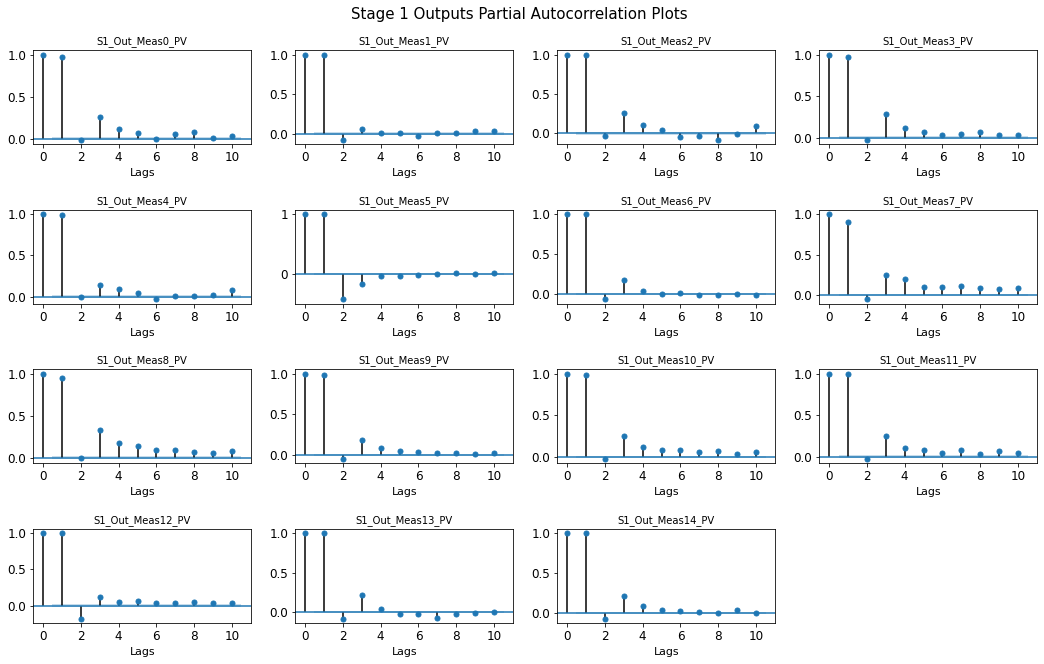

In [64]:
# Plot PACF for Stage 1 Output Measurements
gspec=gridspec.GridSpec(4,4)
fig=plt.figure()
fig.set_size_inches([90,72])
fig.suptitle('Stage 1 Outputs Partial Autocorrelation Plots',fontsize=15)
fig.subplots_adjust(top=0.92,hspace=0.7)
count=0
for i in range(0,4):
    for j in range(0,4):
        count+=1
        if count>15:
            break
        thisplot=plt.subplot(gspec[i,j])
        this_col=PV_S1_col_list[count-1]
        plot_pacf(df_nospke[this_col],lags=10,ax=thisplot,alpha=0.05)
        thisplot.figure.set_size_inches([18,10])
        thisplot.set_title(f"{this_col}",fontsize=10)
        thisplot.tick_params(axis='y', labelsize=12)
        thisplot.tick_params(axis='x', labelsize=12)
        thisplot.set_xlabel('Lags',fontsize=11)

<p align="justify">The PACF's show that all 15 outputs have strong correlations with their 1-sec lags. Beyond 1-sec, it appears all the outputs have some correlation with the later lags - 2, 3, 4,..., up to 10 secs for some of the outputs. Due to the outputs' noisy trends, it is not clear which of these later lagged-correlations is valid vs. false positives. However, from reviewing all 15 plots, it would appear that, at minimum, lags up to 4-secs for each output are worth considering as input features in the model training experiments.</p>

---------------------------------------------------------------------------

# TARGETS & FEATURES SELECTION

<p align="justify">Based on the discussion of the results of the heatmaps and PACF plots reviewed in the previous section, the following lists are proposed as the model targets and initial features respectively. The features list will be initial, as features may be modified/added to the list based on the evaluation results of the model training/validation experiments:</p>



| TARGETS         | INITIAL FEATURES    |
|:----------------|:---------------------|
| S1_Out_Meas0_PV | Ambient_Temperature |
| S1_Out_Meas1_PV | Ambient_Humidity    |
| S1_Out_Meas2_PV | M1_Motor_Amp_PV     |
| S1_Out_Meas3_PV | M1_Matr_Press_PV    |
| S1_Out_Meas4_PV | M1_Matr_Temp_PV     |
| S1_Out_Meas5_PV | M1_RawMat_PropSum   |
| S1_Out_Meas6_PV | M2_Motor_Amp_PV     |
| S1_Out_Meas7_PV | M2_Matr_Press_PV    |
| S1_Out_Meas8_PV | M2_Matr_Temp_PV     |
| S1_Out_Meas9_PV | M2_RawMat_PropSum   |
| S1_Out_Meas10_PV | M3_Motor_Amp_PV    |
| S1_Out_Meas11_PV | M3_Matr_Press_PV   |
| S1_Out_Meas12_PV | M3_Matr_Temp_PV    |
| S1_Out_Meas13_PV | M3_RawMat_PropSum  |
| S1_Out_Meas14_PV | M1_RawMat_FdrParam |
| M1_Motor_RPM_PV  | M2_RawMat_FdrParam |
| M1_Zone1_Temp_PV | M3_RawMat_FdrParam |
| M2_Exit_Temp_PV  |
| M2_Motor_RPM_PV  |
| M2_Zone1_Temp_PV |
| M2_Zone2_Temp_PV |
| M3_Exit_Temp_PV  |
| M3_Motor_RPM_PV  |
| M3_Zone1_Temp_PV |
| M3_Zone2_Temp_PV |

Note the following regarding the Target/Features list above:
* The 2 Stage 1 Combiner operation temperatures - S1_CombnOp_Temp1_PV and S1_CombnOp_Temp2_PV - have been excluded from the features list, as mentioned earlier, due to their expected correlation with other features, as also shown in the input features cross-correlation heatmap.
* Due to some of the features being controlled variables, and therefore leading to controller-induced correlations amongst some uncontrolled variables, the controlled variables have been moved from the features list to the targets list. These variables, e.g. M1_Motor_RPM_PV, M3_Zone2_Temp_PV, etc, will be modeled in the training experiments along with the 15 Stage 1 outputs. 
* To handle the cross-correlations amongst the Raw_Mat_Prop1 to Prop4 variables for Machines 1, 2, and 3, these features have been replaced by calcuated variables - M1_RawMat_PropSum, M2_RawMat_PropSum, and M3_RawMat_PropSum, which are just summations of the 4 variables for each machine; these calculated variables have been created [here](#scrollTo=Z34n7FIWL1uV&line=1&uniqifier=1). Subsequent analyses during the model training steps will also consider creating calculated features for the raw material property variables based on their principal components.
* Controlled variables - M1_Zone2_Temp_PV and M1_Exit_Temp_PV have been excluded from the targets list due to their highly erratic trends.


In [65]:
# Define initial features list for system identification
u_list = ['Ambient_Temperature','Ambient_Humidity',
          'M1_RawMat_FdrParam', 'M2_RawMat_FdrParam', 'M3_RawMat_FdrParam',
          'M1_Motor_Amp_PV','M1_Matr_Press_PV','M1_Matr_Temp_PV','M1_RawMat_PropSum',
          'M2_Motor_Amp_PV','M2_Matr_Press_PV','M2_Matr_Temp_PV','M2_RawMat_PropSum',
          'M3_Motor_Amp_PV','M3_Matr_Press_PV','M3_Matr_Temp_PV','M3_RawMat_PropSum']

# Define targets list for system identification
y_list = ['S1_Out_Meas0_PV','S1_Out_Meas1_PV','S1_Out_Meas2_PV','S1_Out_Meas3_PV','S1_Out_Meas4_PV','S1_Out_Meas5_PV','S1_Out_Meas6_PV',
          'S1_Out_Meas7_PV','S1_Out_Meas8_PV','S1_Out_Meas9_PV','S1_Out_Meas10_PV','S1_Out_Meas11_PV','S1_Out_Meas12_PV','S1_Out_Meas13_PV',
          'S1_Out_Meas14_PV',
          'M1_Motor_RPM_PV','M1_Zone1_Temp_PV',
          'M2_Exit_Temp_PV','M2_Motor_RPM_PV','M2_Zone1_Temp_PV','M2_Zone2_Temp_PV',
          'M3_Exit_Temp_PV','M3_Motor_RPM_PV','M3_Zone1_Temp_PV','M3_Zone2_Temp_PV']

#  Default time-to-steady-state for model simulations (this time span is to ensure that model simulations commence from a steady state
#  wrt to the u-inputs; initial dynamics are removed from the model response.)
ttss = 1200

---------------------------------------------------------------------------

# MODEL STRUCTURE

In this project, the MIMO Auto-Regressive with eXogenous inputs (ARX) model structure will be considered for model training on target variables:

>$\begin{bmatrix}y_{{1}_{t+1}}\\y_{{2}_{t+1}}\\\vdots\\y_{n_{y},t+1}\end{bmatrix} = \begin{bmatrix}\sum_{i=1}^{n_{a}}a_{1,i}y_{1_{t-i+1}}+\sum_{i=1}^{n_{b}}b_{1,1,i}u_{1,t-i-k+1}+\sum_{i=1}^{n_{b}}b_{1,2,i}u_{2,t-i-k+1}+\cdots+\sum_{i=1}^{n_{b}}b_{1,n_{u},i}u_{n_{u},t-i-k+1}+e_{1}(t)\\\sum_{i=1}^{n_{a}}a_{2,i}y_{2_{t-i+1}}+\sum_{i=1}^{n_{b}}b_{2,1,i}u_{1,t-i-k+1}+\sum_{i=1}^{n_{b}}b_{2,2,i}u_{2,t-i-k+1}+\cdots+\sum_{i=1}^{n_{b}}b_{2,n_{u},i}u_{n_{u},t-i-k+1}+e_{2}(t)\\\vdots\\\sum_{i=1}^{n_{a}}a_{n_{y},i}y_{n_{y},{t-i+1}}+\sum_{i=1}^{n_{b}}b_{n_{y},1,i}u_{1,t-i-k+1}+\sum_{i=1}^{n_{b}}b_{n_{y},2,i}u_{2,t-i-k+1}+\cdots+\sum_{i=1}^{n_{b}}b_{n_{y},n_{u},i}u_{n_{u},t-i-k+1}+e_{n_{y}}(t)\end{bmatrix}$

where:

>$y_{t}$ = target variable value at current time index $t$<br>
$y_{t+1}$ = target variable value at future time index $t + 1$<br>
$u_{t-i+1}$ = input feature variable value at time index $t-i+1$<br>
$n_{a}$ = number of coefficients for current and past values of target variable $y$<br>
$a_{i}$ = coefficients for current and past values of $y$ up to $n_{a}-1$ past time steps. These constitute the $A$ matrix<br>
$n_{b}$ = number of coefficients for current and past values of input feature variable $u$<br>
$b_{i}$ = coefficients for current and past values of $u$ up to $n_{b}-1$ past time steps. These constitute the $B$ matrix<br>
$k$ = number of time step delays between input change and target response<br>
$e(t)$ = unmeasured disturbance variable<br>
$n_{y}$ = number of target variables<br>
$n_{u}$ = number of input feature variables<br>

The *.sysid()* system identification function in the python *gekko* library (already installed at the beginning of this notebook) will be utilized on the training portion of the dataset. *sysid()* will attempt to fit optimal values of the $a$ and $b$  coefficients (A and B matrices respectively) in the MIMO ARX model to the dataset, based on hyperparameters - $n_{a}$, $n_{b}$, and $k$

The *.arx()* function will be applied to generate model predictions of the training and validation datasets.




---------------------------------------------------------------------------

**MODEL PERFORMANCE EVALUATION**

To evaluate the MIMO ARX model performance, the Mean-Squared-Error (MSE) will be calculated using the predictions and the validation dataset:

>$MSE = \sum_{i=1}^{n_{y}}\sum_{j=1}^{m}(y_{ij}-\hat{y_{ij}})^{2}$

where:

>$m$ = dataset length<br>
$\hat{y_{ij}}$ = predicted value of $i$-th target ($y_{i}$) at time index $j$<br>
${y_{ij}}$ = actual value of $i$-th target ($y_{i}$) at time index $j$<br>

A baseline MSE will be initially calculated for a MIMO ARX model identified based on hyperparameter values ($n_{a}$, $n_{b}$, $k$) suggested from the EDA above ($n_{a}$=4, $n_{b}$=2; a starting value of $k$=0 will be used).

---------------------------------------------------------------------------

# BASELINE MODEL IDENTIFICATION & EVALUATION

In [66]:
#Define function for MIMO ARX Model Identification and Prediction
# Utilize sysid() and arx() functions in GEKKO library to implement system identification and 
# prediction of y_list variables. Technique is based on post on time series sysid in: 
# (https://stackoverflow.com/questions/37695253/python-identifying-a-state-space-model-for-a-system)

def model_simulate(u_list=u_list,y_list=y_list,len_train=12000,na=4,nb=2,nk=0,ttss=1200,diag=1,disp=True):
    # Define t, u, y data columns, as well as training and validation datasets
    train = df_nospke.index[:len_train] ; valid = df_nospke.index[len_train:]
    t_train = train
    u_train = df_nospke[u_list].loc[train]
    y_train = df_nospke[y_list].loc[train]
    t_valid = valid
    u_valid = df_nospke[u_list].loc[valid]
    y_valid = df_nospke[y_list].loc[valid]

    # generate time-series model
    m = GEKKO(remote=False) # remote=True for MacOS

    # MIMO ARX MODEL IDENTIFICATION
    # NOTE: 'yp' is the model prediction of the targets on the training dataset
    #       'p' is the dict of the MIMO ARX model coefficients
    #       'K' is the gain matrix between the targets and input features 
    yp,p,K = m.sysid(t_train,u_train,y_train,na,nb,nk,diaglevel=diag,pred='meas',scale=True,shift='calc')

    # RUN MODEL PREDICTION ON VALIDATION DATA

    init_ttss = [1 for i in range(0,ttss)]

    # Create GEKKO model
    m = GEKKO(remote=False)

    # Build GEKKO ARX model for prediction
    # NOTE: 'u' is the input features validation dataset 
    #       'y' is the MIMO ARX prediction of the targets on the validation dataset 
    y,u = m.arx(p)

    for i in range(0,len(u_valid.columns)):
        u[i].value = list(u_valid[u_valid.columns[i]].values[0] * np.array(init_ttss)) + list(u_valid[u_valid.columns[i]].values)
   
    m.time = np.linspace(0,len(u_valid)+len(init_ttss)-1,len(u_valid)+len(init_ttss))
    m.options.imode = 4
    m.options.nodes = 2

    # Generate Prediction
    m.solve(disp=disp)

    return yp,p,K,y,u,y_train,y_valid,u_train,u_valid,ttss

# Function to calculate ARX model Mean-Squared-Error (MSE)
def calc_mse(yp,y,y_train,y_valid,lgth=ttss):
    y_pred=pd.DataFrame(np.array(y).T[lgth:],index=y_valid.index,columns=y_valid.columns)
    mse_train=mean_squared_error(yp,y_train.values)
    mse_valid=mean_squared_error(y_pred.values,y_valid.values)
    print(f"MSE for training data = {mse_train}")
    print(f"MSE for validation data = {mse_valid}")
    return mse_train,mse_valid

# Function to plot actual and predicted datasets for model performance review
def plot_predict(testcol,yp,y,ttss,dsply=True,y_list=y_list,plot1gspec=None,gspec=None):
    # Plot prediction of training data
    if gspec==None:
        gspec=gridspec.GridSpec(1,2)
        fig=plt.figure(figsize=[12,5])
        plot1gspec=gspec[0,0]
    else:
        plot1gspec = gspec[plot1gspec]
    plot2gspec=gspec[plot1gspec.get_rows_columns()[2],plot1gspec.get_rows_columns()[4]+1]
    plot1 = plt.subplot(plot1gspec)
    test2=pd.DataFrame(yp[:,y_list.index(testcol)],index=y_train.index,columns=[f"{testcol}_pred"])
    test2[testcol]=y_train[testcol]
    test2[f"{testcol}_pred"].plot(linewidth=3,label='Prediction',legend=True)
    test2[testcol].plot(linewidth=0.5,label='Actual',legend=True)
    (minn,maxx) = plot1.figure.gca().get_ylim()
    plot1.figure.gca().set_title(f"{testcol} Training Dataset")
    plot1.figure.gca().set_xlabel('Time')
    plot1.figure.tight_layout(h_pad=1.5)
            
    # Plot prediction of validation data
    test3=pd.DataFrame(np.array(y[y_list.index(testcol)][ttss:]),columns=[f"{testcol}_pred"],index=y_valid.index)
    test3[testcol]=y_valid[testcol]
    if dsply:
        display(test3)
    plot2 = plt.subplot(plot2gspec)
    test3[f"{testcol}_pred"].plot(linewidth=3,label='Prediction',legend=True)
    test3[testcol].plot(linewidth=0.5,label='Actual',legend=True)
    plot2.figure.gca().tick_params(labelleft=False)
    plot2.figure.gca().set_title(f"{testcol} Validation Dataset")
    plot2.figure.gca().set_xlabel('Time')
    plot2.figure.tight_layout(h_pad=1.5)
            
    # Adjust scales
    minn = min(minn,plot2.figure.gca().get_ylim()[0])
    maxx = max(maxx,plot2.figure.gca().get_ylim()[1])
    minn =  max(minn-(0.25*(maxx-minn)),0)
    plot2.figure.gca().set_ylim((minn,maxx))
    plt.subplot(plot1gspec).figure.gca().set_ylim((minn,maxx))



In [67]:
# Train baseline MIMO ARX model and calculate MSE. 
yp1,p1,K1,y1,u1,y_train,y_valid,u_train,u_valid,ttss = model_simulate(na=4,nb=2,nk=0,diag=0,disp=False)
base_mse=calc_mse(yp1,y1,y_train,y_valid)

MSE for training data = 0.07257058417844733
MSE for validation data = 0.6893209601522173


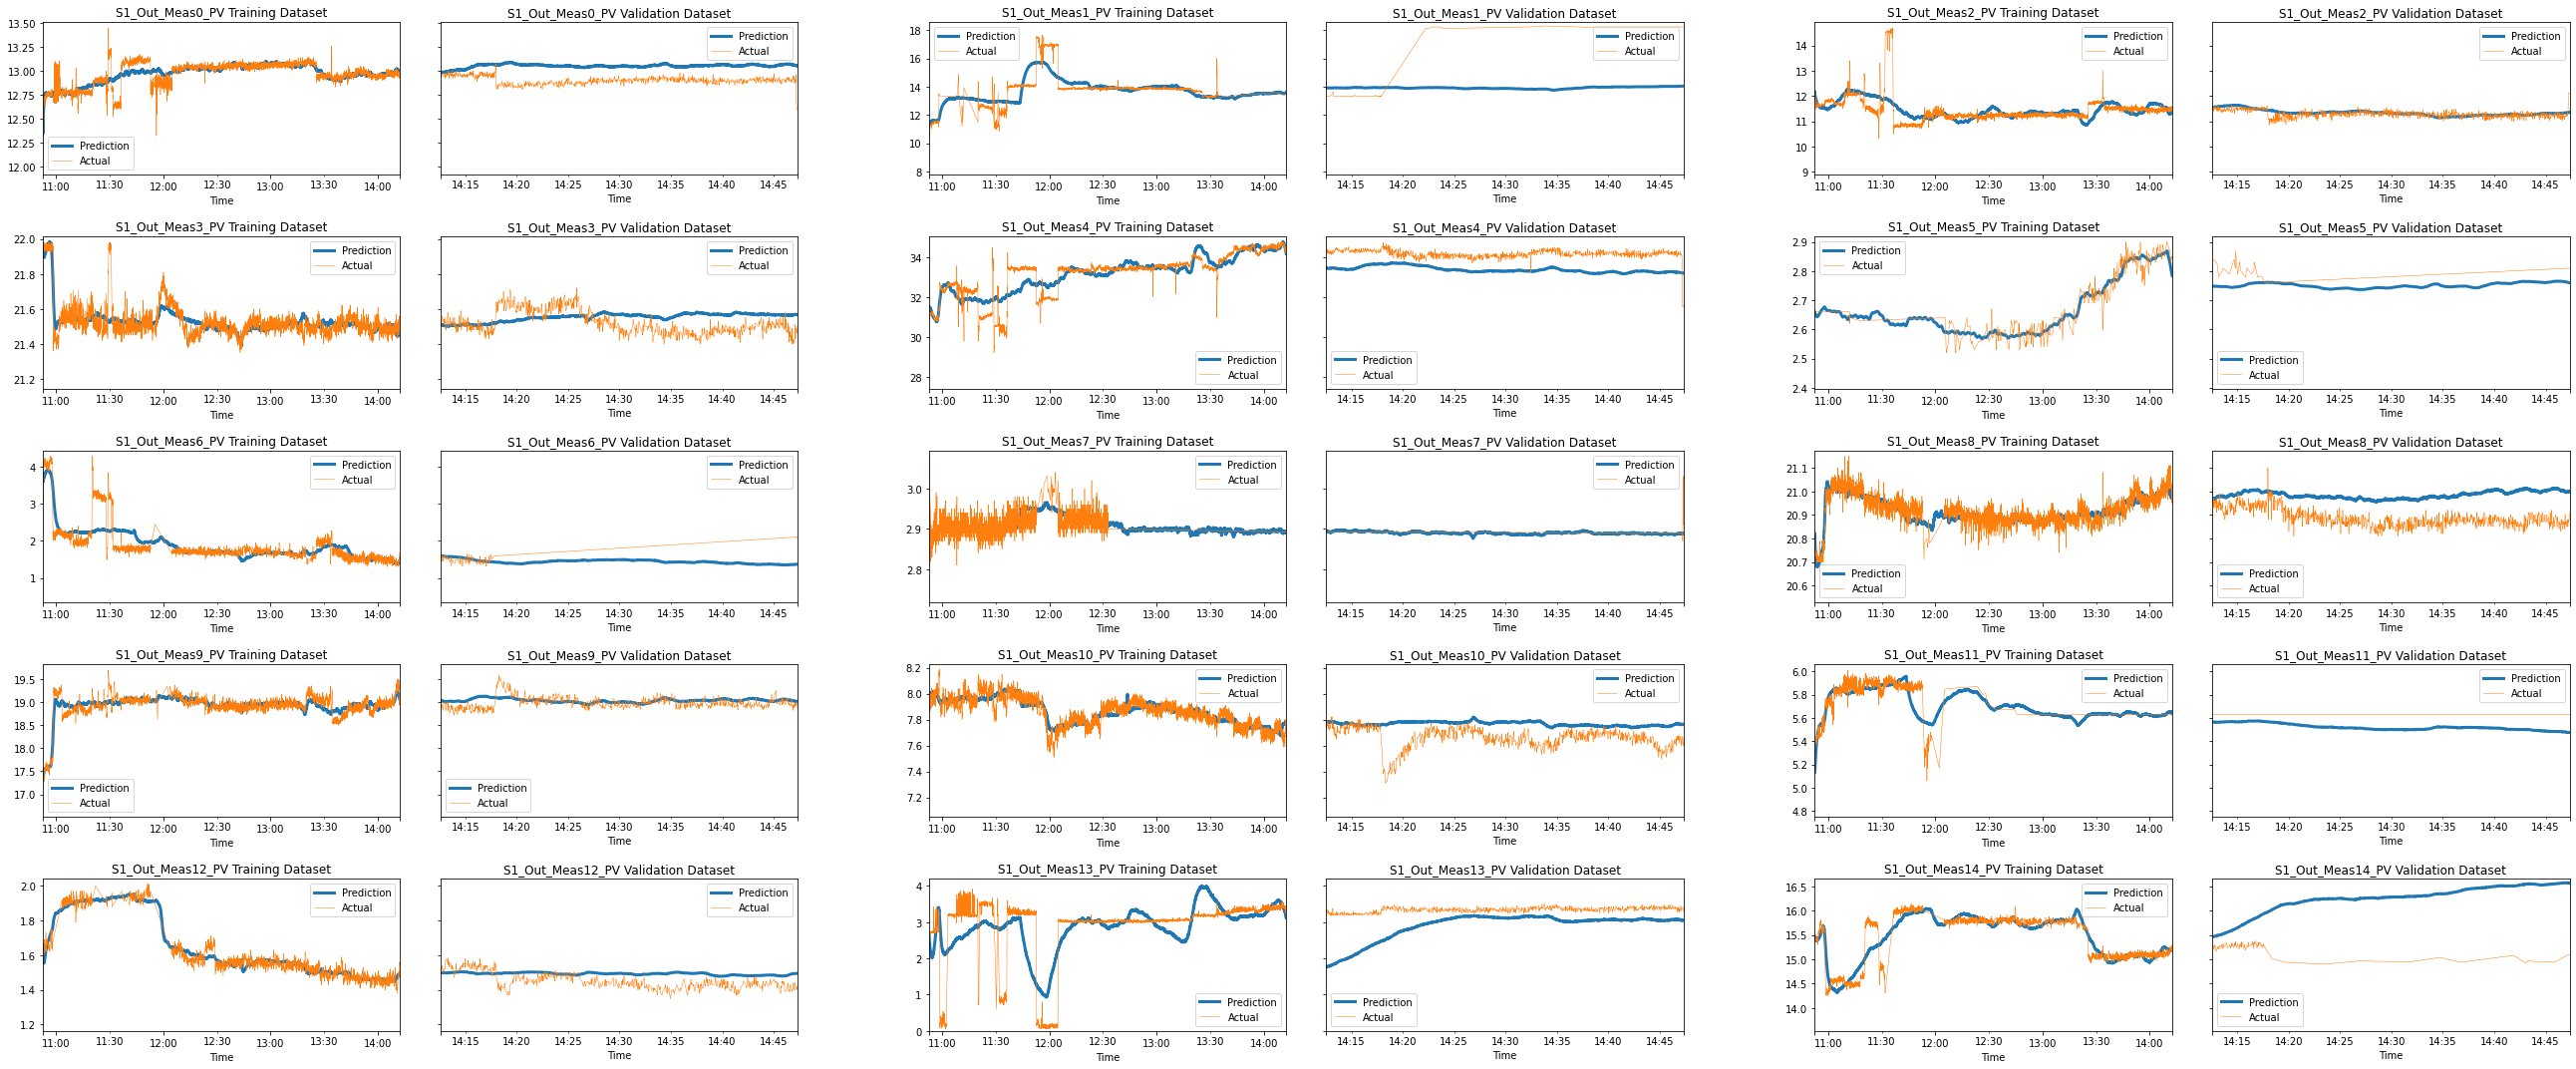

In [68]:
# Plot response trends for baseline model prediction of training/validation datasets for the 15 Stage 1 outputs
def plot_predict_multi(yp,y,col_list,ttss=1200):
    gspec=gridspec.GridSpec(5,8,width_ratios=[7,7,1,7,7,1,7,7])
    fig=plt.figure(figsize=[36,15])
    count=0
    for i in range(0,5):
        for j in range(0,8,3):
            count+=1
            if count>40:
                break
            this_col=col_list[count-1]
            plot_predict(this_col,yp,y,ttss=ttss,dsply=False,plot1gspec=(i,j),gspec=gspec)

plot_predict_multi(yp1,y1,PV_S1_col_list)

---------------------------------------------------------------------------

**PRINCIPAL COMPONENT ANALYSIS**

Recall above that amongst the input features, the *Raw_Mat_Prop1* to *Prop4* variables for Machines 1, 2, and 3 were identified as uncontrolled variables that were likely manually moved during the production line test-run due to the step-like nature of their trends. It was also discovered during the cross-correlation analysis that the 4 variables for each machine were correlated. The workaround to prevent including these variables as independent input features in the model training step was to create a new calculated feature *_RawMat_PropSum* for each machine, as a sum of all 4 variables, in place of these variables.

Next, in attempting to improve the performance metrics of the baseline MIMO ARX model identified above, the Principal Component Analysis (PCA) of the *Raw_Mat_Prop1*/*Prop4* variables will be considered. PCA helps in the decorrelation of correlated features by converting them into uncorrelated principal components. In creating the components, PCA applies weights to the features being summed up (vs. just summing them up) such that the highest variations amongst the features are captured in as few of the components as possible. 

A simple description of PCA can be found [here](https://towardsdatascience.com/principal-component-analysis-pca-explained-visually-with-zero-math-1cbf392b9e7d).

In [69]:
# Create PCA Components for the correlated RawMat inputs
# Define some functions

def calc_pca(mc_id):
    # Copy RawMat columns
    features = [f"M{mc_id}_RawMat_Prop{i}" for i in range(1,5)]
    X = df_nospke.copy(deep=True).loc[:,features]

    # Standardize
    X_scaled = (X - X.mean(axis=0))/X.std(axis=0)

    # Create principal components
    pca = PCA()
    X_pca =  pca.fit_transform(X_scaled)
    component_names = [f"M{mc_id}_RawMat_Prop_PC{i+1}" for i in range(X_pca.shape[1])]
    X_pca = pd.DataFrame(X_pca, columns = component_names,index=X_scaled.index)

    # Calculate PCA loadings
    loadings = pd.DataFrame(
                            pca.components_.T,
                            columns = component_names,
                            index = X.columns
    )
    return pca,X_pca,loadings,X_scaled

# Function to look at plot of explained variance
def plot_variance(pca, width=8, dpi=100):
    # Create figure
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)
    # Explained variance
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(
        xlabel="Component", title=f"{pca.feature_names_in_[0][:-6]} Props\n % Explained Variance", ylim=(0.0, 1.05)
    )
    # Cumulative Variance
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
    axs[1].set(
        xlabel="Component", title=f"{pca.feature_names_in_[0][:-6]} Props\n % Cumulative Variance", ylim=(0.0, 1.05)
    )
    # Set up figure
    fig.set(figwidth=6, figheight=3,dpi=100)
    return axs

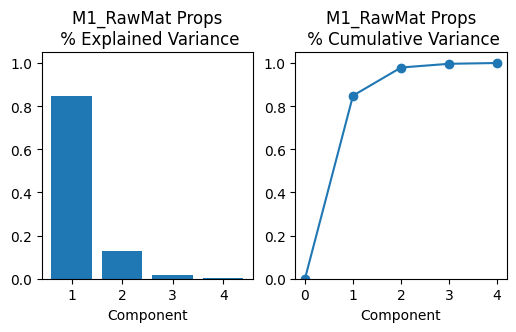

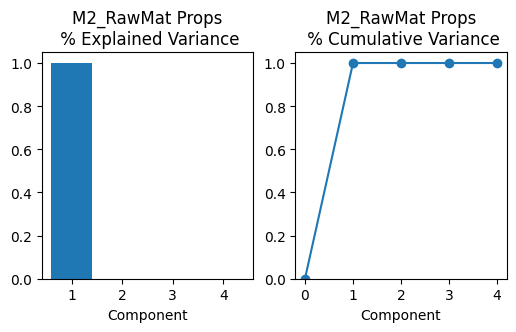

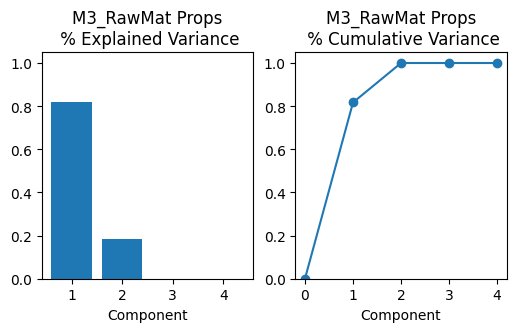

In [70]:
# Calculate the principal components of the 4 RawMat inputs for each of the 3 machines 
# (i.e. M1_RawMat_Prop1 to Prop4, M2_RawMat_Prop1 to Prop4, etc)
pca1,X_pca1,loadings1,_=calc_pca(1)
pca2,X_pca2,loadings2,_=calc_pca(2)
pca3,X_pca3,loadings3,_=calc_pca(3)

# Create plots of explained variance by the principal components of each machine
# M1
plot_variance(pca1);
#M2
plot_variance(pca2);
#M3
plot_variance(pca3);

# Principal Component Loadings
#display(loadings1,loadings2,loadings3)    # Uncomment, if there's interest in viewing the 3 sets of principal component loadings

From the review of the plots of the % explained variances of the principal  components of Machines 1 - 3, it can be seen that:


*   For Machine 1, nearly 100% of the RawMat variances are captured by Principal Components 1 and 2 (PC1 and PC2)
*   For Machine 2, 100% of the RawMat variances are captured by Principal Component 1 (PC1)
*   For Machine 3, nearly 100% of the RawMat variances are captured by Principal Components 1 and 2 (PC1 and PC2)

It therefore appears adequate to include just the 5 principal components as inputs in the model inputs list, instead of all 12 PC's. This will help to prevent model overfitting on the unhelpful PC's. Since the PC's are linear representations of the RawMat_Prop variables, the "RawMat_PropSum" calculated features created in a cell above can be removed from the df_nospke dataframe, and replaced by the 5 chosen PC's.

In [71]:
# Re-build 'df_nospke' dataframe, including the 5 principal components transformations discussed above.
df_nospke = pd.concat([despiked_df(),X_pca1[X_pca1.columns[:2]],
                       X_pca2[X_pca2.columns[:1]],
                       X_pca3[X_pca3.columns[:2]]],axis=1)

# Update the model inputs list, replacing the 'RawMat_PropSum' calculated inputs by the 5 principal components transformations
u_list2 = u_list + [col for col in df_nospke.columns if 'PC' in col]
u_list2 = [col for col in u_list2 if 'PropSum' not in col]
display(u_list2)

['Ambient_Temperature',
 'Ambient_Humidity',
 'M1_RawMat_FdrParam',
 'M2_RawMat_FdrParam',
 'M3_RawMat_FdrParam',
 'M1_Motor_Amp_PV',
 'M1_Matr_Press_PV',
 'M1_Matr_Temp_PV',
 'M2_Motor_Amp_PV',
 'M2_Matr_Press_PV',
 'M2_Matr_Temp_PV',
 'M3_Motor_Amp_PV',
 'M3_Matr_Press_PV',
 'M3_Matr_Temp_PV',
 'M1_RawMat_Prop_PC1',
 'M1_RawMat_Prop_PC2',
 'M2_RawMat_Prop_PC1',
 'M3_RawMat_Prop_PC1',
 'M3_RawMat_Prop_PC2']

In [72]:
# Re-train baseline MIMO ARX model based on updated input features list, and calculate MSE. 
yp2,p2,K2,y2,u2,y_train,y_valid,u_train,u_valid,ttss = model_simulate(u_list=u_list2,na=4,nb=2,nk=0,diag=0,disp=False)
base_pca_mse=calc_mse(yp2,y2,y_train,y_valid)

MSE for training data = 0.06641804770979455
MSE for validation data = 0.7307851876783664


It appears the update of the input features list to include the principal components has improved the MIMO ARX model performance (lower MSE) on the training dataset, but with approximately unchanged performance on the validation dataset. Subsequent model training rounds will utilize the updated input features list.

---------------------------------------------------------------------------

# MODEL PARAMETERS TUNING

The next step is to iterate the MIMO ARX model training over a grid of model parameters - $n_{a}$, $n_{b}$, and $k$. The model performance metrics (training MSE and validation MSE) will be computed for each trained model. The results will be saved in a dataframe for review.

In [73]:
# Specify model parameters grid
param_dict = {'na':[x for x in range(1,5)],
              'nb':[x for x in range(1,4)],
              'nk':[x for x in range(0,11)]}
display(param_dict)

{'na': [1, 2, 3, 4], 'nb': [1, 2, 3], 'nk': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}

In [74]:
# Function to iterate the MIMO ARX model training over the parameter grid space defined in the previous cell.
# Training and Validation MSEs for the trained models are computed and collated into a dataframe
# and saved to .csv file 'model_grid.csv'.
# NOTE: if the model training algorithm is unable to converge to a solution for a parameter grid point, it will skip
# to the next grid point.
def model_iterate():
    df_grid = np.array([])
    for na in param_dict['na']:
        for nb in param_dict['nb']:
            for nk in param_dict['nk']:
                display(f"na = {na}, nb = {nb}, nk = {nk}")
                try:
                    yp,p,K,y,u,y_train,y_valid,u_train,u_valid,ttss = model_simulate(u_list=u_list2,na=na,nb=nb,nk=nk,diag=0,disp=False)
                except:
                    continue
                mse=calc_mse(yp,y,y_train,y_valid)
                add = [na,nb,nk,mse[0],mse[1]]
                df_grid = np.concatenate([df_grid,np.array(add)],axis=0)
    df_grid = pd.DataFrame(df_grid.reshape(int(len(df_grid)/5),5),columns=['na','nb','nk','Train MSE','Valid MSE'],
                        index=pd.Index(np.arange(0,int(len(df_grid)/5)),name='Iter. Id'))
    df_grid.to_csv('model_grid.csv',index=True)

#model_iterate()  # -- Uncomment to generate the performance metrics dataframe of the model parameters grid. 
                  # -- Note that this function takes some hours to complete over the defined grid space. Alternatively,
                  # -- can just load 'model_grid.csv' file already included in github repo.

---------------------------------------------------------------------------

**MODEL TUNING RESULTS**

The function *model_iterate()* in the previous cell generates the *model_grid.csv* file. This file has been pre-generated from a previous execution of this notebook and included with this notebook (this is in case preference is not to execute the function, which will take some hours to complete). The file is re-loaded below into the *df_grid* dataframe.

In [75]:
# Re-load .csv file into dataframe, sort model performance metrics in ascending order, and review
df_grid = pd.read_csv(path + 'model_grid.csv',index_col='Iter. Id').sort_values(['Valid MSE','Train MSE','na','nb'],
                                                                                ascending=True)
df_grid = df_grid.set_index(pd.Index(np.arange(0,len(df_grid)),name=df_grid.index.name))
display(df_grid)

na  nb  nk  Train MSE  Valid MSE
Iter. Id                                  
0          1   1   9   0.063098   0.497477
1          1   2   8   0.063098   0.497477
2          1   3   7   0.063098   0.497477
3          1   1  10   0.063571   0.520328
4          1   2   9   0.063571   0.520328
...       ..  ..  ..        ...        ...
121        3   3   0   0.065638   0.752816
122        4   1   0   0.066714   0.761544
123        4   1   2   0.065761   0.770108
124        4   2   1   0.065761   0.770108
125        4   3   0   0.065761   0.770108

[126 rows x 5 columns]

From reviewing the performance metric-sorted *df_grid*, it would appear the best model performance in the parameter grid space is obtained from $(n_{a}=1, n_{b}=1, k=9)$ with MSEs - Training MSE=0.063, Validation MSE=0.497. Since the models show similar performance for values - $n_{b}=2,3$, the most parsimonious model structure will be selected as the final model. The results suggests attempting to model a higher number of coefficients for $n_{a}$ or $n_{b}$ leads to model overfitting. $k=9$ suggests that, on average, there's a 9-sec delay between changes in the input features and the targets' responses.

---------------------------------------------------------------------------

**MODEL SELECTION & TARGETS PREDICTION TRENDS**

From the model tuning results in the previous section, the MIMO ARX model structure - $(n_{a}=1, n_{b}=1, k=9)$ has been found to be the best-performing structure from the hyperparameter tuning iterations. This model structure will be selected as the final model. Training of this selected structure and trending of predictions will be performed below. The model training will be made verbose this time, to show the identified model coefficients.

In [76]:
# Train selected model
yp_selctd,p_selctd,K_selctd,y_selctd,u_selctd,y_train,y_valid,u_train,u_valid,ttss_selctd = model_simulate(u_list=u_list2,
                                                                                                    na=1,nb=1,nk=9,
                                                                                                    diag=1,disp=False)

---Final---
Gain
[[-4.93695043e-02  1.64659506e-01 -3.58156156e-02  1.97393215e-01
  -2.26821505e-02  1.31298132e-01 -1.21581129e-01  5.62741153e-01
   1.28332797e-01 -2.57493252e-02 -9.61627309e-01 -1.03132339e-02
   3.51625009e-02  7.43055384e-01  6.00963556e-03  2.36085684e-02
  -2.07704689e-02  6.77411236e-02 -1.65528094e-01]
 [ 8.68822921e-02  2.24983008e-01  1.04896275e-01 -2.98112988e-01
   1.49012408e-02  2.78966969e-01  2.83690743e-01  4.79869222e-02
   2.11277298e-01 -6.25131317e-01 -6.87963642e-01 -6.92046483e-01
  -2.06141640e-01 -1.31879104e-01  1.18357627e-01  7.04511198e-02
  -2.56914163e-01  6.65990532e-02  4.29690189e-01]
 [ 1.26055293e-01 -2.79825704e-01  1.08901455e-01  2.43314650e-02
  -3.51558915e-01 -7.12912107e-01  1.02808755e+00 -6.55180832e-01
  -1.32470053e-01  9.81552421e-01  2.87657001e+00 -3.26103037e-01
   3.21630770e-01 -7.92480304e-01  2.45705070e-01  7.98490833e-02
   1.34888114e-01 -9.39247376e-02  2.03884612e-01]
 [ 5.11340817e-02  2.79342082e-02  2.6

Note that from the model training summary above, *alpha* refers to the $A$ matrix coefficients, *beta* refers to the $B$ matrix coefficients, *gamma* refers to the array of coefficients of the model output biases.

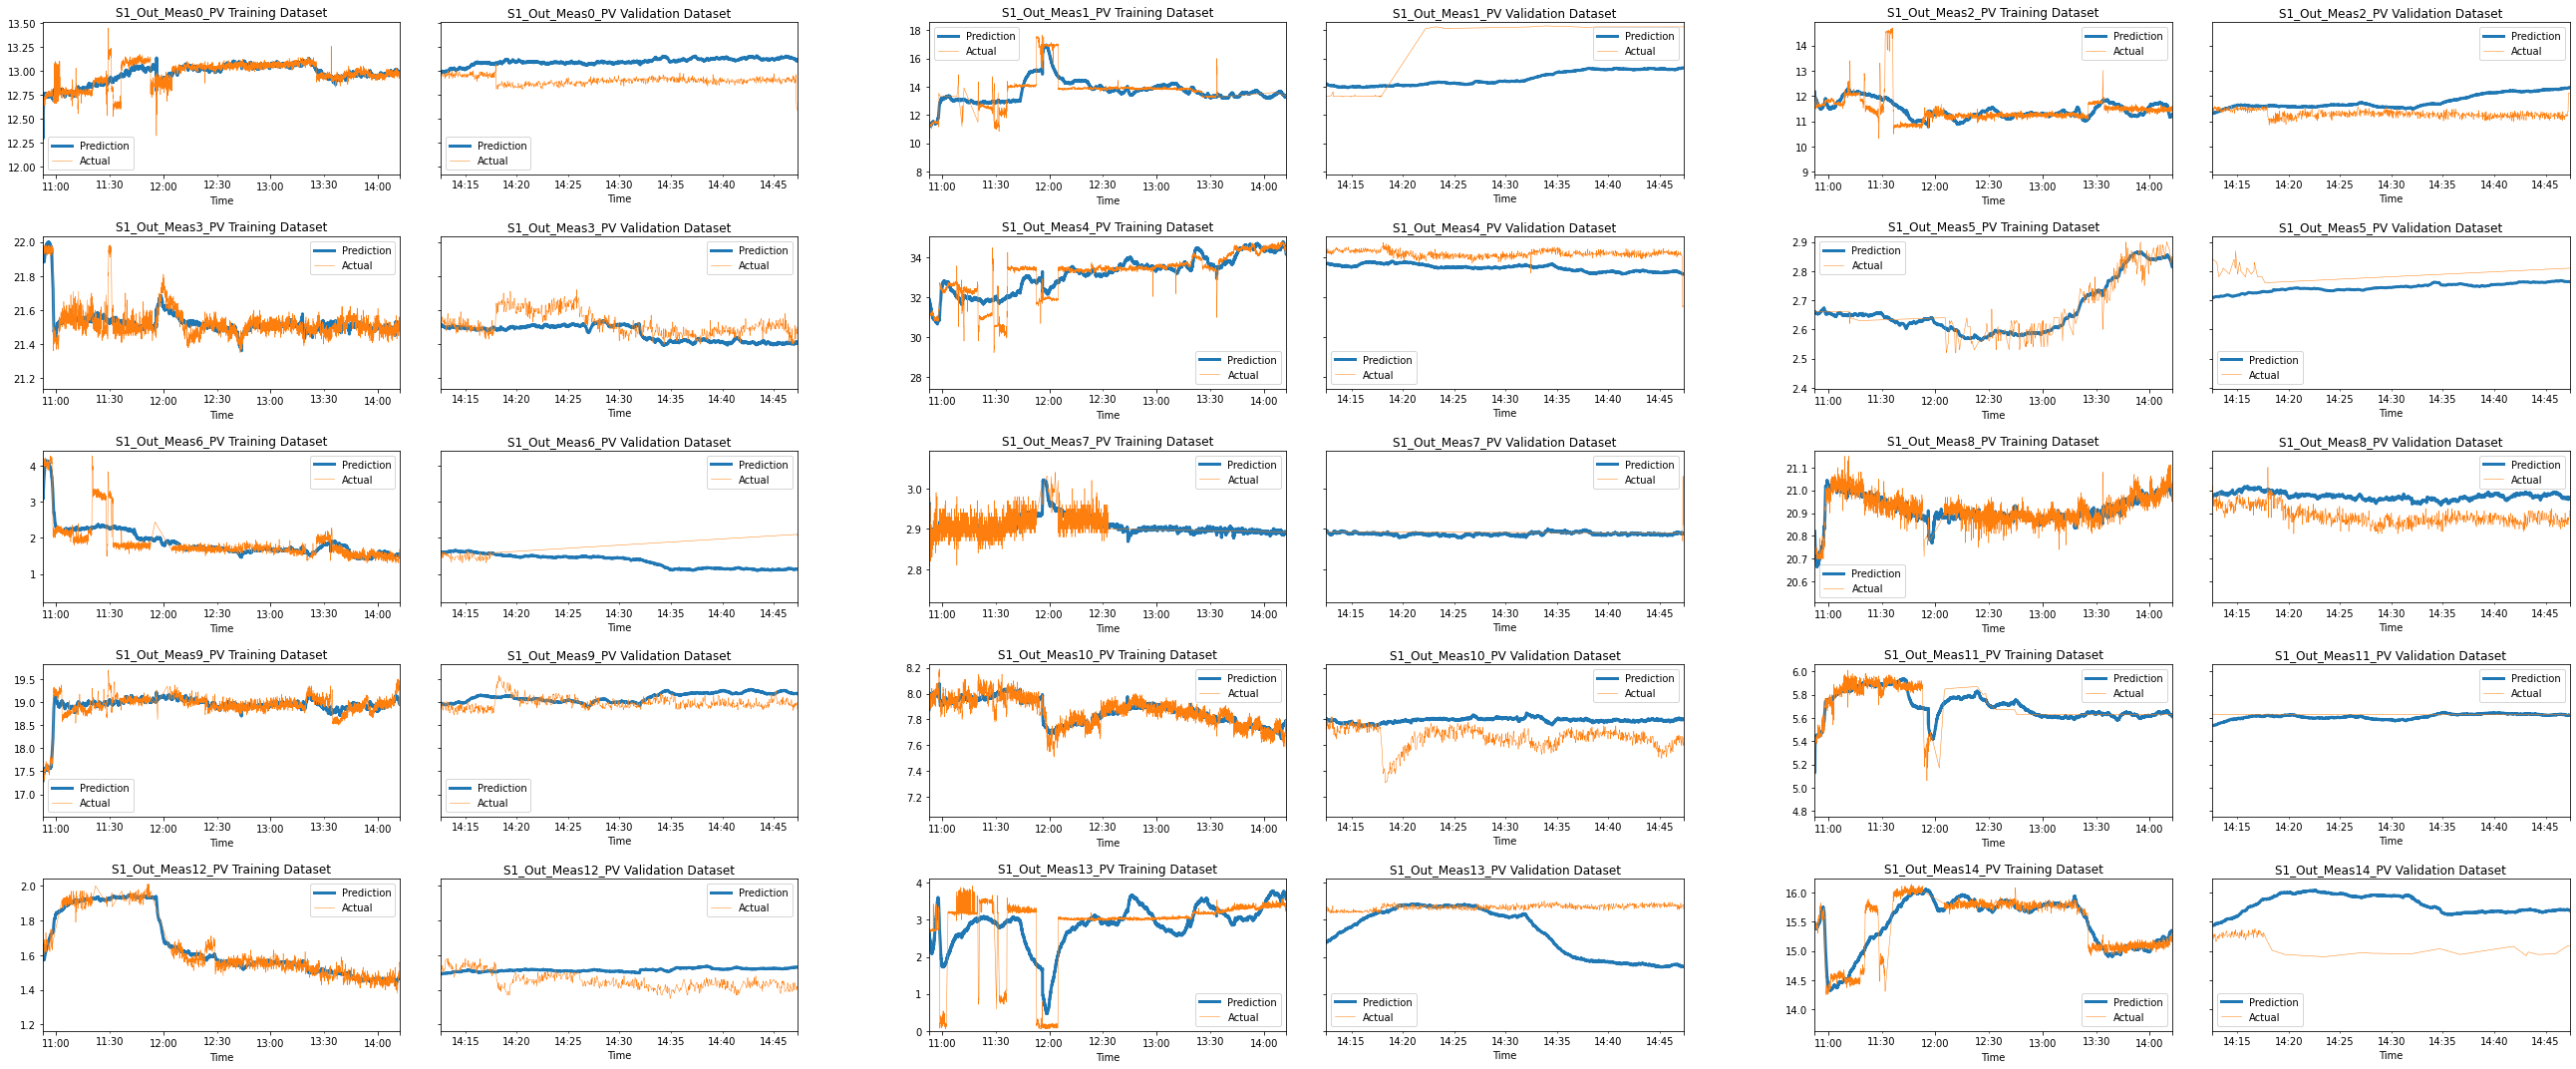

In [77]:
# Plot selected model's predictions of the 15 Stage 1 outputs
plot_predict_multi(yp_selctd,y_selctd,PV_S1_col_list,ttss=ttss_selctd)

As mentioned [here](#scrollTo=J2WQ_S3GJZ5o), some of the 15 Stage 1 outputs had such inadequate dataset quality (such as *S1_Out_Meas1_PV*, *S1_Out_Meas7_PV*, and *S1_Out_Meas13_PV*), that the model identified for these outputs were not expected to yield good predictions. This can be seen in the predictions for *S1_Out_Meas1_PV*, *S1_Out_Meas13_PV*, *S1_Out_Meas14_PV*, etc. It should also be pointed out that the identified MIMO ARX model does not structurally incorporate the disturbance/noise model identification for the targets' residuals (actual values - predictions), which is an opportunity for future work to help improve prediction accuracy.

---------------------------------------------------------------------------

# CONCLUSION & SUGGESTED OPPORTUNITIES



ML techniques have been applied to the Liveline dataset to attempt to train a linear time-invariant MIMO ARX model to predict the 15 measurements of the Stage 1 Combiner output. The business value of achieving this objective is that it serves as an enabler for several production applications, such as developing process control applications, for optimal control of the business value-driving process variables of the production line, or help operate the production line within health, environmental, and equipment safety limits. 

Suggested opportunities for future work are:
* If feasible for future production line test runs, the production team could look into improving the data collection quality, to reduce the instances of spikes and zero-dips in the dataset;
 * As part of planning future production line test runs, consideration could also be given to ensuring that the manual step moves to be made on some of the stimulus process variables are un-correlated;
* Considering other algorithms for the imputation of the spikes and missing values observed in several of the variables in the dataset. An example of an algorithm that could be explored is the Kalman filter for missing measurements;
* Model training for the 15 Stage 2 outputs;
* A linear time-invariant model structure had been assumed for this project's objective. Non-linearities in the target variables' dynamics could also be explored, and incorprated into the model;
* Identification of disturbance models for the target variables' residuals from their MIMO ARX model predictions. The ARMAX model could therefore be considered, instead of the ARX structure.